# **Customer Churn Prediction**
`Raden Dissa Shafira`

# I. Introduction

Perusahaan-perusahaan modern kini semakin menyadari pentingnya mempertahankan pelanggan. Pasalnya, pelanggan yang "loyal" akan menghemat biaya promosi dan menciptakan kondisi kestabilan finansial yag lebih baik. Keberhasilan suatu perusahaan dalam mempertahankan pelanggan akan berdampak positif terhadap keberlanjutan bisnis dan pertumbuhan jangka panjang. Oleh karena itu, memiliki kemampuan untuk memprediksi perilaku pelanggan menjadi sangat penting--salah satunya adalah dengan memprediksi perilaku "*churn*" pelanggan. *Churn* merupakan istilah yang digunakan untuk menggambarkan keadaan ketika pelanggan atau pengguna berhenti menggunakan produk atau layanan yang ditawarkan oleh suatu perusahaan. Dalam konteks bisnis, *churn* mengacu pada kehilangan pelanggan yang dapat berdampak negatif pada pendapatan dan pertumbuhan perusahaan. 

Prediksi *churn* merupakan upaya untuk mengidentifikasi pelanggan yang berpotensi melakukan *churn* sehingga perusahaan dapat mengambil langkah-langkah pencegahan untuk mempertahankan pelanggan.

**Problem Statement:**

Diperlukan model Artificial Neural Network (ANN) untuk memprediksi pelanggan *churn* dari platform *e-commerce* perusahaan dengan tujuan untuk meminimalisir serta mengidentifikasi pelanggan yang berpotensi untuk *churn*. Dalam pelaksanaannya, diperlukan percobaan *modelling* seperti model ANN Sequential dan Functional, serta dengan beberapa poin *improvement* untuk mendapatkan hasil yang terbaik. 

Dengan mengidentifikasi pelanggan yang berisiko *churn* dengan akurat, perusahaan dapat mengambil tindakan pencegahan yang tepat; memberikan penawaran khusus, meningkatkan kualitas layanan, melakukan interaksi tertentu untuk mempertahankan pelanggan--sehingga diharapkan dapat mengurangi risiko berkurangnya pendapatan. 


**Dataset:**

 Dataset yang digunakan berisi informasi mengenai pelanggan seperti riwayat pembelian, frekuensi penggunaan, interaksi dengan layanan, serta fitur-fitur lainnya. Berikut adalah informasi mengenai keterangan umum dataset:


| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

**Question and Assumptions:**

Dalam proyek ini juga akan ada beberapa pertanyaan dan asumsi yang menjadi ketertarikan dari proyek ini, yakni:
1. Apakah ada korelasi dari kolom-kolom atribut dengan target? Jika ada, apa saja serta apa asumsi dibalik korelasinya?
2. Dari model yang akan dibuat, bagaimana evaluasinya? Apa model serta parameter terbaik untuk mengolah data tersebut?
3. Apa kelebihan dan kekurangan dari model dalam sisi bisnis?
4. Apa strategi bisnis yang disarankan berdasarkan eksplorasi data maupun proses lainnya?
5. Apa yang dapat dikembangkan dari proyek ini (baik dalam modelling maupun proses lainnya)?

# II. Import Libraries
Berisi library yang akan digunakan dalam project.

In [69]:
# library math dan visualisasi
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np

# feature engineering
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer   
from feature_engine.outliers import Winsorizer  # untuk capping outlier

# selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import chi2_contingency 

# tf model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

# save model& inferencing
import pickle
from tensorflow.keras.models import load_model

# evaluasi
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

# other
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# III. Data Loading
Bagian ini berisikan data loading serta pengecekan mengenai banyak data, isi data, ukuran data, dan sebagainya untuk mengetahui bagian apa yang berpotensi untuk diamati lebih lanjut.

In [4]:
# loading data
df = pd.read_csv('churn.csv')
# melihat jumlah baris dan kolom data
df.shape

(37010, 22)

In [5]:
# menampilkan 10 data pertama
df.head(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [6]:
# menampilkan 10 data terakhir
df.tail(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [7]:
# melihat informasi general data; tipe data serta jumlah data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [8]:
# melihat deskripsi serta tendensi sentral data
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


Diketahui bahwa data terdiri dari 37010 baris serta 22 kolom. Kolom yang akan kami gunakan sebagai target adalah 'churn_risk_score' dengan value 0 yang berarti tidak terjadi *churn*, serta 1 yang berarti *churn*. Ditemukan juga ada beberapa value yang `negative` dan memerlukan analisis lebih lanjut. Untuk selanjutnya data akan dieksplorasi dengan lebih mendetail. 

# IV. EDA


Bagian ini berisikan eksplorasi data pada dataset dimana akan dilakukan pembuatan query, grouping, serta visualisasi data. Bagian ini akan menekankan deskripsi serta keterhubungan data secara prinsip.

- Melihat deskripsi data (tendensi sentral, maksimal, minimum, dan sebagainya)
- Melihat persebaran data pada dataset berbasis numerikal, dan melihat rasio data kategorikal.
- Melihat korelasi fitur dengan data target 'churn_risk_score'.
- Menentukan model yang akan dipakai melihat dari pola korelasi fitur dan target.

### Data Cleaning

**Missing Values**

In [9]:
# melihat apakah ada data terduplikasi
df.duplicated().sum()

18

In [10]:
# menghapus data yang terindikasi terduplikasi
df.drop_duplicates(inplace=True)

In [11]:
# memastikan sudah tidak ada data terduplikasi
df.duplicated().sum()

0

In [12]:
# melihat jika ada data yang hilang
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Ditemukan ada data yang hilang pada kolom 'gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation'. Hal ini akan menjadi catatan, sementara penanganannya akan ditangani pada bagian pre-processing.

**Early Feature Selection**

Diketahui bahwa ada beberapa kolom yang dianggap tidak berkorelasi dengan target. Kolom-kolom yang akan disingkirkan beserta alasannya adalah:

- 'user_id': Karena dianggap hanya merupakan pembeda identitas. 
- 'last_visit_time' dan 'joining_date mode': Karena merupakan data tipe tanggal yang dianggap kurang *compatible* untuk model prediksi kategorikal--namun kolom-kolom tersebut tetap kita simpan untuk diteliti lebih lanjut pada bagian eksplorasi data. 

In [13]:
# menyimpan kolom yang akan di-drop ke dalam variabel
dropped_cols = ['user_id','last_visit_time', 'joining_date']

# drop semua kolom dropped_columns
df_drop = df.copy() # membuat copy
df_drop = df_drop.drop(['user_id','last_visit_time', 'joining_date'], axis=1)
df_drop.head(2)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,NaN,No Membership,Yes,Without Offers,NaN,Wi-Fi,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,NaN,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1


**Anomaly**

Ditemukan bahwa ada anomali pada kolom 'days_since_last_login' yang memiliki value negatif. Hal ini sepertinya diakibatkan oleh salah input atau mungkin ada penamaan khusus yang dilakukan saat pengisian data. Akan dilakukan penelitian lebih mengenai kolom tersebut. 

In [14]:
# melihat detail mengenai kolom hari negatif
df[df['days_since_last_login'] > 0].head(2)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1


Kolom tanggal 'last_visit_time' tidak menentukan hari 'days_since_last_login'--yang ditandai dengan kedua baris memiliki jumlah hari terakhir login yang berbeda. 

In [15]:
# melihat detail mengenai kolom hari negatif
negative_days = df[df['days_since_last_login'] < 0]
negative_days

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
56,846e5d098ccea5d0,11,M,Village,Gold Membership,2017-08-01,NaN,Gift Vouchers/Coupons,Smartphone,Mobile_Data,02:49:31,-999,208.89,11876.12,26.0,666.79000,Yes,No,No,Not Applicable,Poor Product Quality,1
71,93415f6df1dfb2fc,51,F,Town,Basic Membership,2015-12-02,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,00:00:25,-999,30.76,49293.08,8.0,653.61000,No,Yes,No,Not Applicable,Poor Website,1
90,83f7dd56ba3a0464,52,F,NaN,Basic Membership,2017-04-20,Yes,NaN,Smartphone,Wi-Fi,23:32:55,-999,68.82,28467.12,0.0,0.00000,Yes,No,No,Not Applicable,Poor Customer Service,1
119,8815dc1a2f57e42e,24,F,City,Basic Membership,2017-07-24,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,06:37:14,-999,105.40,19189.84,0.0,0.00000,Yes,No,Yes,Solved,Poor Website,1
120,b30748c2a4f4ade9,46,M,City,No Membership,2017-11-13,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,09:00:13,-999,101.01,27353.61,0.0,372.36373,Yes,No,Yes,Unsolved,No reason specified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36952,8f0f8a44fe390347,40,M,City,Basic Membership,2016-03-24,No,Without Offers,Desktop,Wi-Fi,18:53:26,-999,57.77,30897.25,5.0,849.32639,No,Yes,Yes,Unsolved,Poor Product Quality,1
36965,81e8bfde0968fcb4,56,F,City,Premium Membership,2016-02-11,NaN,Gift Vouchers/Coupons,Desktop,Wi-Fi,04:50:15,-999,191.65,89666.75,4.0,848.73000,Yes,No,No,Not Applicable,Quality Customer Care,0
36973,b48a8082ff2b932e,59,M,Town,Platinum Membership,2015-06-24,Yes,Credit/Debit Card Offers,Smartphone,Fiber_Optic,02:21:58,-999,32.95,17350.38,10.0,746.45000,Yes,No,No,Not Applicable,Too many ads,0
36999,bb5eb87592709200,52,M,Town,Gold Membership,2017-03-30,Yes,Credit/Debit Card Offers,NaN,Fiber_Optic,11:47:24,-999,831.49,37021.18,25.0,751.48000,No,Yes,Yes,No Information Available,Poor Website,0


In [16]:
# menghitung jumlah customer pada tiap membership
df['membership_category'].value_counts()

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

In [17]:
# menghitung jumlah value count kolom membership pada hari yang minus
negative_days['membership_category'].value_counts()

No Membership          436
Basic Membership       408
Gold Membership        366
Silver Membership      324
Premium Membership     235
Platinum Membership    230
Name: membership_category, dtype: int64

In [18]:
# melihat korelasi kolom anomali terhadap target
df.corr()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
age,1.000000,-0.003970,0.000548,-0.000473,-0.001769,-0.000995,0.006124
days_since_last_login,-0.003970,1.000000,0.000040,0.003934,-0.000941,0.000046,-0.006228
avg_time_spent,0.000548,0.000040,1.000000,0.022731,-0.001520,-0.001395,-0.013244
avg_transaction_value,-0.000473,0.003934,0.022731,1.000000,-0.116673,0.056403,-0.218012
avg_frequency_login_days,-0.001769,-0.000941,-0.001520,-0.116673,1.000000,-0.025831,0.113525
points_in_wallet,-0.000995,0.000046,-0.001395,0.056403,-0.025831,1.000000,-0.200166
churn_risk_score,0.006124,-0.006228,-0.013244,-0.218012,0.113525,-0.200166,1.000000


Diketahui bahwa ada keanehan pada kolom tersebut yang sepertinya merupakan hal yang random. Kami belum dapat menemukan korelasinya dengan kolom data lainnya karena tidak ditemukan kesamaan entah dari tanggal, waktu pembayaran, region, dan kolom-kolom lainnya. Kami memutuskan untuk melakukan `drop baris` untuk bagian analisis karena dianggap akan mengganggu analisis--sementara untuk bagian modelling, kami akan mempertimbangkan korelasi serta hal lainnya, sehingga mungkin kami akan mempertimbangkan `drop kolom` ataupun mengimputasi data. 

Selain itu, jumlah baris negatif sejumlah 2001 baris memang terkesan merupakan jumlah yang banyak, namun bila dibandingkan dengan jumlah total baris yang kami miliki (37010 baris) sepertinya kami masih dapat `menanggung resiko kehilangan` sekitar 5% informasi data dibandingkan menyimpannya dan menimbulkan bias pada analisis. 

In [19]:
# melakukan drop pada baris yang memiliki value negatif
df_pos_drop = df_drop[df_drop['days_since_last_login'] > 0]
df_pos= df[df['days_since_last_login'] > 0]
df_pos.shape

(34993, 22)

Data sudah dibersihkan dari value negatif dan kini tersisa 35009 baris. 

### Split Data Type

Berdasarkan deskripsi data yang telah dicantumkan pada bagian Introduction, kami sudah dapat mengasumsikan kolom mana saja yang merupakan kolom numerikal dan kategorikal. Oleh karena itu akan dilakukan pemisahan kolom sesuai masing-masing tipe data. 

**Date type**

In [20]:
# convert menjadi date type 
df['joining_date'] = pd.to_datetime(df['joining_date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       36992 non-null  object        
 1   age                           36992 non-null  int64         
 2   gender                        36933 non-null  object        
 3   region_category               31564 non-null  object        
 4   membership_category           36992 non-null  object        
 5   joining_date                  36992 non-null  datetime64[ns]
 6   joined_through_referral       31554 non-null  object        
 7   preferred_offer_types         36704 non-null  object        
 8   medium_of_operation           31599 non-null  object        
 9   internet_option               36992 non-null  object        
 10  last_visit_time               36992 non-null  object        
 11  days_since_last_login       

**Numerical & Categorical**

In [21]:
# mengelompokkan kolom num & num tanpa target saja
num_cols = [column for column in df.select_dtypes(include=['int64', 'float64'])]
numer_cols = [column for column in df.select_dtypes(include=['int64', 'float64'])if column != 'last_visit_time']
featnum_cols = [column for column in df.select_dtypes(include=['int64', 'float64'])if column != 'churn_risk_score']

# mengelompokkan kolom date
date_cols = ['joining_date', 'last_visit_time']
# mengelompokkan kolom cat
cat_cols = [column for column in df.select_dtypes(include=['object']) if column != 'user_id' and column != 'last_visit_time']
cat_cols

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

### Numerical

**Descriptive**

In [24]:
# mengelompokkkan dan melihat deskripsi kolom numerikal
df_num = df[featnum_cols]
df_num.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,279.147450,29271.194003,14.658617,623.562421
std,15.867412,228.819900,329.947709,19444.806226,9.479184,270.263994
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,7.000000,574.135000
50%,37.000000,12.000000,161.765000,27554.485000,14.000000,680.370000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761


In [25]:
# melihat bentuk penyebaran data
df_pos[featnum_cols].apply(lambda x: round(x.skew(), 3))

age                        -0.005
days_since_last_login       0.029
avg_time_spent              2.276
avg_transaction_value       1.008
avg_frequency_login_days    0.392
points_in_wallet           -0.777
dtype: float64

Berdasarkan nilai skewness untuk kolom numerikal tersebut, diketahui bahwa:
- Kolom 'avg_time_spent', 'avg_transaction_value' memiliki nilai skewness yang positif. 
- Kolom 'points_in_wallet' memiliki nilai skewness negatif, atau yang berarti nilai rata-ratanya melebihi nilai tengah. 
- Kolom 'avg_frequency_login_days', 'days_since_last_login' memiliki skewness positif (0.3) dan 'age' memiliki nilai skewness negatif (0.008) namun keduanya memiliki nilai yang mendekati nol. Perlu dilakukan visualisasi karena tidak semua nilai skewness yang mendekati nilai nol akan menentukan apakah data tersebut terdistribusi normal atau tidak (bisa jadi *double-peak* *uniform*, dan sebagainya)

Secara garis besar, mayoritas dari kolom berbentuk skewed. 

**Visualization**

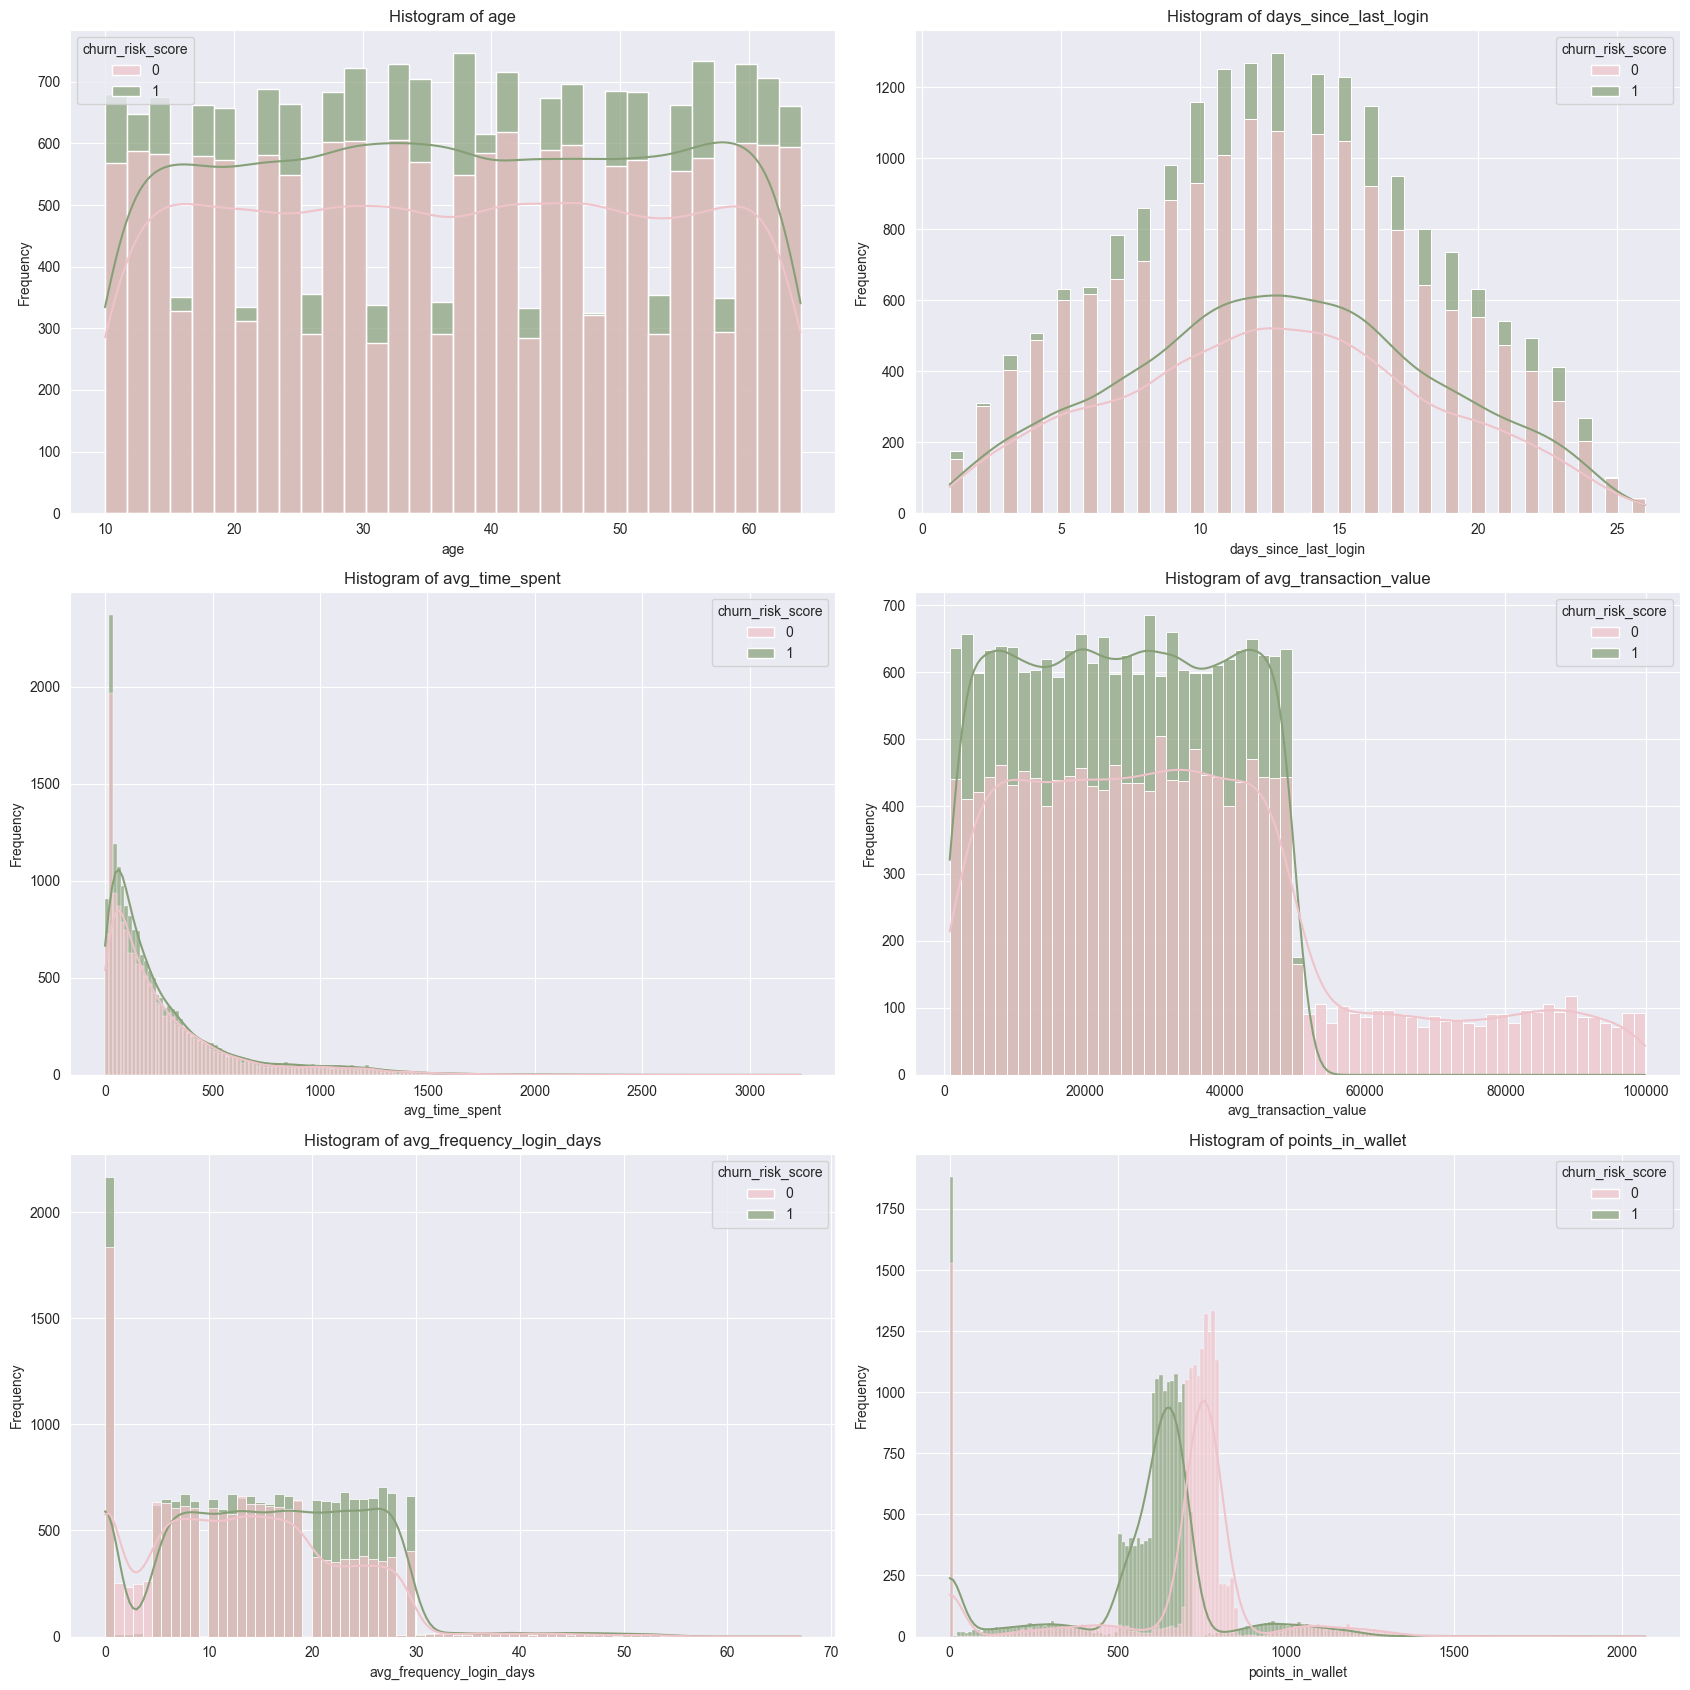

In [546]:
# Membuat canvas
fig, axes = plt.subplots(3, 2, figsize=(17, 17))
#prepare palette
custom_palette = ['#EFc3ca', '#869f77',"#f7f6c6"]
# Looping histogram
for i, ax in enumerate(axes.flatten()):
    if i < len(featnum_cols):
        # Membuat histogram dengan hue
        sns.histplot(data=df_pos, x=featnum_cols[i], palette=custom_palette, hue='churn_risk_score', alpha=0.7, ax=ax, kde=True)
        ax.set_title(f'Histogram of {featnum_cols[i]}')
        ax.set_xlabel(featnum_cols[i])
        ax.set_ylabel('Frequency')
        ax.grid(True, color='white')  # Grid untuk memudahkan visualisasi
    else:
        fig.delaxes(ax) #hapus canvas berlebih
        
# Show plot
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

Pada visualisasi tersebut, perlu diketahui bahwa warna merah muda keabuan menggambarkan kategori *churn* dan *tidak churn* yang `bertumpuk/ overlay` (bukan merupakan *stacked bar*). Seterusnya, berdasarkan deskripsi beserta visualisasi, dapat diketahui bahwa:

- 'age': Umur pelanggan terdistribusi secara `uniform` dengan sedikit peningkatan pada interval umur 30-40 tahun dan 55-60 tahun. Hal ini menunjukkan bahwa pelanggan yang berbelanja pada perusahaan cukup variatif, yang kemudian menggambarkan produk serta target pemasaran dari perusahaan adalah untuk semua kalangan/ umur.

- 'days_since_last_login': Data terdistribusi dengan normal dengan jangkauan 1 hingga 26 hari. Mayoritas pelanggan kira-kira terakhir melakukan login 13 hari dari waktu data *cut-off*, yang menunjukkan bahwa banyak pelanggan yang `belum melakukan login` maupun transaksi lagi sejak `dua minggu kebelakang`.

- 'avg_time_spent': Pelanggan paling banyak menghabiskan waktu pada angka 50 yang kami asumsikan dalam satuan menit. Banyak pelanggan yang mampu menghabiskan begitu banyak waktu dalam platform perusahaan, namun dapat menjadi catatan bahwa `waktu efektif` untuk berbelanja online pada adalah sekitar satu jam. 

- 'avg_transaction_value': Pada kolom ini data terdistribusi secara unik, dimana data terbagi menjadi dua; interval \$0-\$50,000 serta interval \$50,001-\$100,000. Dalam grafis ini, terlihat bahwa pelanggan yang memiliki rata-rata pembelian dibawah \$50,000 akan memiliki kemungkinan untuk *churn* yang lebih tinggi. 

- 'avg_frequency_login_days': Mayoritas pelanggan melakukan rata-rata login sebanyak 0 hari. Selain itu, ditemukan hal unik dimana pelanggan yang melakukan login dari interval 1-4 hari akan memiliki tendensi untuk `tidak churn`. Sebaliknya, pelanggan yang melakukan login sebanyak 20-30 yang terkesan lebih loyal justru memiliki tendensi untuk *churn*. Sepertinya, banyak pelanggan yang sudah berbelanja sebanyak lebih dari 20 kali yang `kemudian mengalami kekecewaan` dengan produk/ layanan perusahaan. Sementara itu, pelanggan-pelanggan baru yang baru melakukan sedikit transaksi justru `belum` mengalami hal yang membuat mereka ingin meninggalkan layanan perusahaan. 

- 'points_in_wallet': Pelanggan dengan poin lebih rendah akan memiliki tendensi untuk *churn* lebih tinggi dengan batasan kira-kira 750 poin. Hal ini menunjukkan bahwa mereka yang telah `melakukan banyak transaksi` (mungkin dalam jumlah) sepertinya lebih `memiliki loyalitas` terhadap perusahaan. Atau mungkin juga karena mereka sudah berbelanja susah payah untuk melepaskan poin tersebut (karena sudah terkumpul banyak poin, akan rugi rasanya untuk pindah ke *platform* lain dan menyesuaikan dengan sistem *platform* lain dari awal) 

### Categorical

**Descriptive**

In [31]:
# mengelompokkkan dan melihat deskripsi kolom categorical
df_cat = df[cat_cols]
df_cat.describe()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36933,31564,36992,31554,36704,31599,36992,36992,36992,36992,36992,36992
unique,2,3,6,2,3,3,3,2,2,2,5,9
top,F,Town,Basic Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,18490,14128,7724,15839,12349,13913,12413,20342,20440,18602,18602,6350


In [32]:
# melihat nilai unik kolom feedback
df['feedback'].unique()

array(['Poor Website', 'Poor Customer Service', 'Too many ads',
       'Poor Product Quality', 'No reason specified',
       'Products always in Stock', 'Reasonable Price',
       'Quality Customer Care', 'User Friendly Website'], dtype=object)

In [33]:
# melihat nilai unik kolom complaint_status
df['complaint_status'].unique()

array(['No Information Available', 'Not Applicable', 'Unsolved', 'Solved',
       'Solved in Follow-up'], dtype=object)

Dari deskripsi tersebut, diketahui bahwa dataset memiliki kolom kategorikal yang terbagi atas:
- Nominal: 'region_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'complaint_status', 'feedback'
- Binary: 'gender', 'joined_through_referral, 'used_special_discount', 'offer_application_preference', 'past_complaint'
- Ordinal: 'membership_category'

Kolom 'feedback' kami masukan sebagai kolom nominal karena tidak memiliki ranking yang terbaca. Walaupun begitu, sebenarnya kami dapat mengelompokkan `kardinalitas` dari masing-masing feedback yang memiliki value positif, netral, serta negatif ke dalam tiga kelompok ordinal (berdasarkan kepuasan) seperti pada tabel di bawah ini. 

In [34]:
# membentuk dictionary
feedback_mapping = {
    'Poor Website': 0, # 0 untuk negatif
    'Poor Customer Service': 0,
    'Too many ads': 0,
    'Poor Product Quality': 0,
    'No reason specified': 1, # 1 untuk netral
    'Products always in Stock': 2, # 2 untuk feedback positif
    'Reasonable Price': 2,
    'Quality Customer Care': 2,
    'User Friendly Website': 2
}

df_fb = df_pos_drop.copy()
# membuat olom baru berisi hasil handling kardinalitas
df_fb['feedback_cat'] = df_fb['feedback'].map(feedback_mapping)
feed_cols = cat_cols + ['feedback_cat'] # cat cols baru include feedback cat
df_fb.head(2)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,feedback_cat
0,29,F,NaN,No Membership,Yes,Without Offers,NaN,Wi-Fi,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,0
1,50,M,NaN,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1,0


**Visualization**

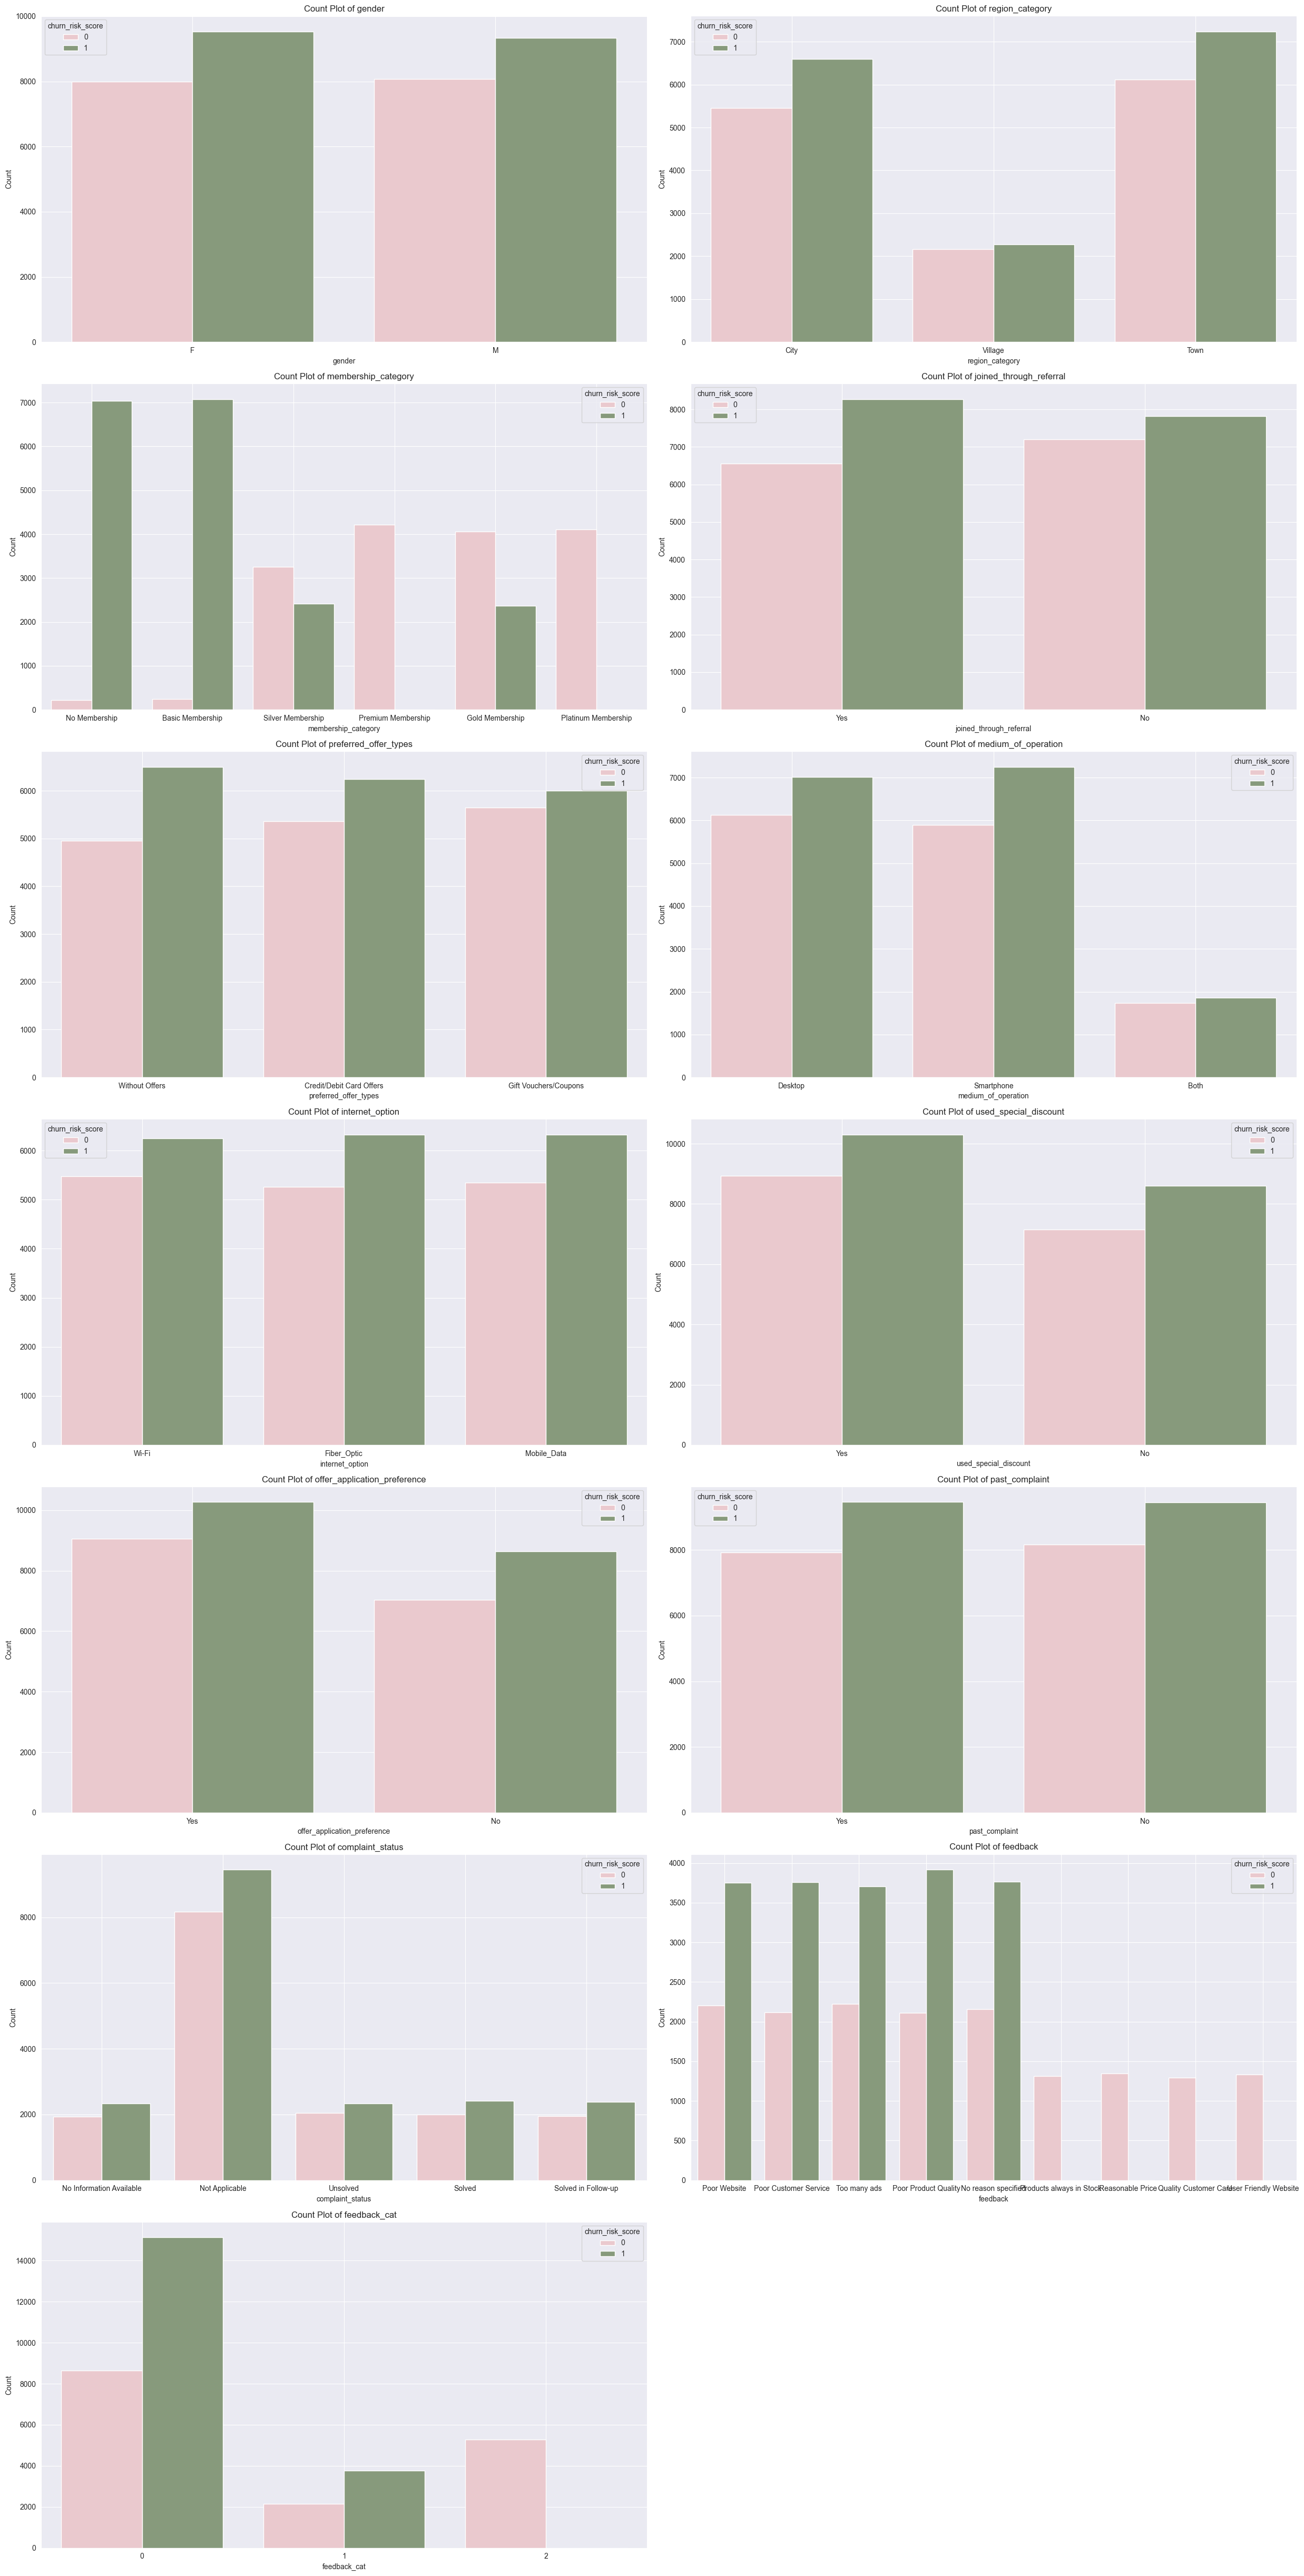

In [35]:
# prepare canvas
cols_total = len(feed_cols)
num_rows = (cols_total + 1) // 2  # kalkulasi jumlah plot sesuai kolom
fig, axes = plt.subplots(num_rows, 2, figsize=(25, 7 * num_rows))


for i, column in enumerate(feed_cols):
    row = i // 2  # nomor baris
    col = i % 2   # nomor kolom subplot

    # membuat count plot
    ax = sns.countplot(x=column, data=df_fb, hue='churn_risk_score', palette=custom_palette, ax=axes[row, col])
    ax.set_title(f'Count Plot of {column}') # judul
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels())
    ax.grid(True, color='white')  # grid untuk visualisasi

# hapus kolom berlebih
if cols_total % 2 != 0:
    fig.delaxes(axes[-1, -1])
    
# show plot
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

Dari kumpulan plot di atas, dapat diketahui bahwa relasi frekuensi kolom kategorikal dengan 'churn_risk_score' adalah sebagai berikut:

- 'gender': Jumlah pelanggan wanita dan pria terdistribusi dengan baik. Hubungan dengan target tidak begitu signifikan, namun memang wanita sedikit lebih cenderung untu *churn*. 

- 'region_category': Mayoritas pelangagan berasal dari *town* (kota kecil), sedangkan rasio hubungan tiap kategori dengan target tidak begitu signifikan. 

- 'membership_category': Pelanggan yang tidak memiliki membership serta hanya memiliki Basic membership memiliki rate *churn* yang sangat tinggi. Sementara itu, pelanggan yang sudah mencapai level `Premium dan Platinum tidak memiliki pelanggan churn`. 

- 'joined_through_referral': Ada kecenderungan *churn* pada pelanggan yang mulai bergabung melalui *referral*. Mungkin karena mereka bergabung karena mendapatkan promo/ ditawari oleh teman, `bukan karena mereka benar-benar tertarik` dengan produk dan layanan perusahaan. 

- 'preferred_offer_types': Ada kecenderungan *churn* yang lebih sedikit untuk pelanggan yang lebih memilih penawaran kupon. 

- 'medium_of_operation': Ada keseimbangan diantara pengguna desktop dan smartphone. Sementara untuk perbandingannya terhadap target tidak begitu signifikan. 

- 'internet_option': Cukup terbagi rata dan perbandingan terhadap target tidak begitu signifikan. 

- 'used_special_discount': Lebih banyak pelanggan yang berbelanja saat diskon. Namun untuk perbandignannya dengan target sendiri tidak begitu signifikan, kedua kategori tetap memiliki kecenderungan untuk *churn*. 

- 'offer_application_preference': Lebih banyak pelanggan yang memilih penawaran, namun perbandingan terhadap target tidak begitu signifikan. 

- 'past_complaint': Ada keseimbangan diantara pelanggan yang telah melakukan komplain dan yang tidak pernah. Sementara untuk perbandingannya terhadap target tidak begitu signifikan. 

- 'complaint_status': Kebanyakan pelanggan memiliki status komplain *not applicable*. Hal ini dapat berarti ketika tidak ada keluhan yang diajukan oleh pelanggan atau ketika status keluhan tidak relevan dengan konteks atau situasi tertentu.

- 'feedback': Komplain yang paling banyak menyebabkan` churn adalah kualitas produk`. namun selain daripada itu, semua komplain terlihat menyebabkan *churn* pada perusahaan.

- 'feedback_cat': Mayoritas pelanggan memiliki masukan yang negatif (komplain). Selain itu, pelanggan yang memiliki `masukan negatif` juga memiliki tendensi untuk *churn*. 

### Target Correlation

**Target Ratio**

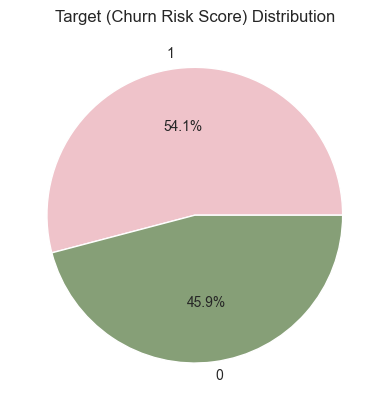

In [41]:
# memvisualisasikan rasio target 
target_counts = df_drop['churn_risk_score'].value_counts() # count

# membuat pie chart
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=custom_palette)
plt.title('Target (Churn Risk Score) Distribution')
plt.show()

In [40]:
# melihat jumlah total customer churn
df['churn_risk_score'].value_counts()

1    20012
0    16980
Name: churn_risk_score, dtype: int64

Diketahui bahwa perusahaan memiliki skor *churn* (index = 1) yang termasuk sangat tinggi, yakni mencapai hingga lebih dari setengah total pelanggan. Sementara lain, data dinilai sudah cukup *balance* karena memiliki perbandingan sekitar 5:4, maka tidak perlu dilakukan *oversampling* atau *undersampling* pada data. 

**Features Visualization**

<Axes: xlabel='avg_frequency_login_days', ylabel='avg_transaction_value'>

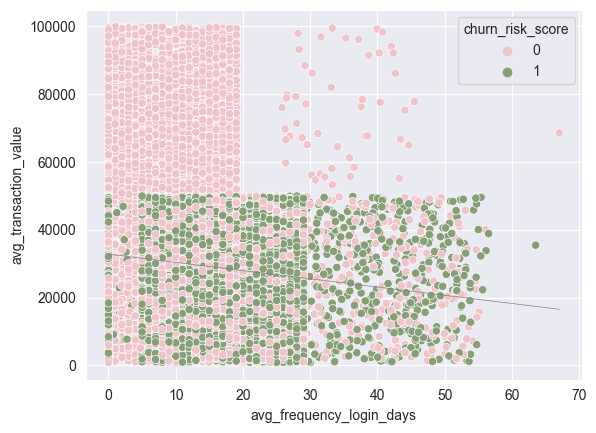

In [39]:
# scatter plot 
sns.scatterplot(x='avg_frequency_login_days', y='avg_transaction_value', data=df_pos_drop, hue='churn_risk_score', palette=custom_palette)
sns.regplot(x='avg_frequency_login_days', y='avg_transaction_value', data=df_pos_drop, scatter=False, color='grey', ci=None, line_kws={'linewidth': 0.5})

Diketahui bahwa ada beberapa cluster yang terbentuk dari korelasi kedua fitur jumlah transaksi serta jumlah login. Namun secara garis besar, terlihat bahwa pelanggan *churn* `tidak akan mencapai` jumlah transaksi lebih dari \$50,000 (sudah meninggalkan platform sebelum mereka dapat mencapai angka tersebut).

<Axes: xlabel='avg_transaction_value', ylabel='age'>

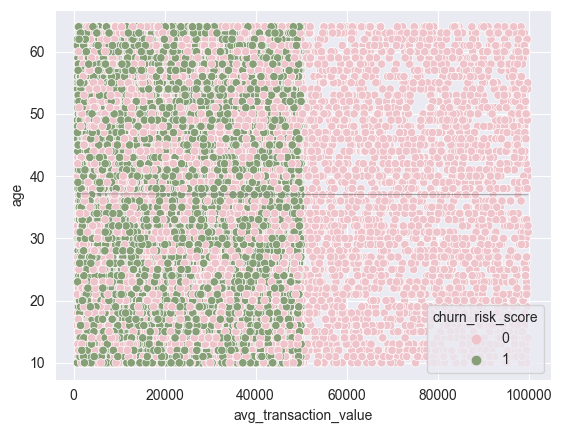

In [42]:
# scatter plot 
sns.scatterplot(x='avg_transaction_value', y='age', data=df_pos_drop, hue='churn_risk_score', palette=custom_palette)
sns.regplot(x='avg_transaction_value', y='age', data=df_pos_drop, scatter=False, color='grey', ci=None, line_kws={'linewidth': 0.5})

**Features Grouping**

In [56]:
# grouping dengan melihat complaint dan feedback 
df_pos_drop.groupby(['churn_risk_score'])[['membership_category']].value_counts()

churn_risk_score  membership_category
0                 Premium Membership     4220
                  Platinum Membership    4108
                  Gold Membership        4057
                  Silver Membership      3252
                  Basic Membership        239
                  No Membership           214
1                 Basic Membership       7077
                  No Membership          7042
                  Silver Membership      2412
                  Gold Membership        2372
dtype: int64

Terlihat bahwa pelanggan yang tidak *churn* memiiki sangat sedikit member yang memiliki status basic ataupun tidak memiliki member. Sementara itu, kebalikannnya dengan pelanggan yang *churn*, mayoritas memiliki status tanpa member ataupun basic. 

`Penentuan membership` suatu pelanggan sebenarnya dapat dikelompokkan berdasarkan frekuensi pembelian, total pembelian, dan faktor lainnya. Jika asumsi tersebut benar, maka pelanggan yang jarang berbelanja dan melakukan total pembelian berjumlah sedikit akan masuk dalam kategori 'No Membership' hingga 'Basic Membership'. Pelanggan ini merupakan pelanggan yang jarang berbelanja dan tidak memiliki loyalitas pada perusaahaan--bahkan mungkin, sudah berlangganan dengan perusahaan lain. 

Sebaliknya, untuk pelanggan yang merupakan membership tingkatan atas, akan memiiki loyalitas lebih dan lebih "sulit" untuk meninggalkan layanan perusahaan. Hal ini dapat diakibarkan karena produk dan layanan perusahaan yang memang cocok, promo dan diskon yang cocok, interface yang mudah, atau bahkan `rasa nyaman` pelanggan yang sulit dijelaskan dengan satu faktor. 

In [54]:
# grouping dengan melihat complaint dan feedback 
df_pos_drop.groupby(['churn_risk_score','membership_category'])[['avg_time_spent']].mean()

avg_time_spent
churn_risk_score membership_category                
0                Basic Membership         286.753700
                 Gold Membership          284.159228
                 No Membership            264.951303
                 Platinum Membership      282.468482
                 Premium Membership       291.417589
                 Silver Membership        275.973899
1                Basic Membership         274.461562
                 Gold Membership          277.093413
                 No Membership            276.496840
                 Silver Membership        274.792864

Pelanggan dengan tendensi untuk *churn* memiliki waktu rata-rata yang `lebih rendah` dibandingkan pelanggan yang tidak *churn*. Hal ini bisa jadi diakibarkan karena pelanggan tersebut tidak begitu tertarik dengan produk ataupun layanan perusahaan. Sementara itu sebaliknya, pelanggan yang lebih loyal mungkin akan menghabiskan waktu berjam-jam untuk berbelanja pada platform kami.

In [52]:
# grouping dengan melihat complaint dan feedback 
df_pos_drop.groupby(['churn_risk_score','joined_through_referral'])[['avg_transaction_value']].mean()

avg_transaction_value
churn_risk_score joined_through_referral                       
0                No                                35060.251970
                 Yes                               32725.526595
1                No                                25261.126647
                 Yes                               25475.351720

Pelanggan yang memiliki tendensi *churn* akan memiliki total pembelian yang lebih rendah dibandingkan yang tidak. 

In [51]:
# grouping dengan melihat total pembelian serta membership
df_pos_drop.groupby(['churn_risk_score','membership_category'])[['avg_transaction_value']].mean()

avg_transaction_value
churn_risk_score membership_category                       
0                Basic Membership              26138.472552
                 Gold Membership               34217.563300
                 No Membership                 25522.913505
                 Platinum Membership           35332.998588
                 Premium Membership            35259.140927
                 Silver Membership             30941.769262
1                Basic Membership              25190.070986
                 Gold Membership               25943.621648
                 No Membership                 25430.301981
                 Silver Membership             25293.649954

Pelanggan dengan membership yang lebih tinggi biasanya akan memiliki jumlah total pembelanjaan yang lebih tinggi. Namun dalam kasus member platinum, premium, dan gold, sepertinya angkanya tidak terlalu jauh secara signifikan. Mungkin pembagian dari membership tidak hanya berdasarkan atas total pembelian, tetapi juga frekuensi pembelian serta faktor lainnya 

In [602]:
# grouping dengan melihat complaint dan feedback 
df_pos_drop.groupby(['churn_risk_score','past_complaint'])[['complaint_status']].value_counts()

churn_risk_score  past_complaint  complaint_status        
0                 No              Not Applicable              8169
                  Yes             Unsolved                    2045
                                  Solved                      1991
                                  Solved in Follow-up         1950
                                  No Information Available    1935
1                 No              Not Applicable              9446
                  Yes             Solved                      2410
                                  Solved in Follow-up         2378
                                  No Information Available    2336
                                  Unsolved                    2333
dtype: int64

Diketahui bahwa pelanggan yang belum pernah mengirim komplain akan masuk pada kategori 'Not Applicable'. Selain itu, ada keunikan bahwa pelanggan yang *churn* `memiliki komplain yang sudah teratasi` (*solved*) namun `tetap memutuskan untuk churn`. 

In [57]:
# grouping dengan melihat complaint dan feedback 
df_pos_drop.groupby(['churn_risk_score','past_complaint', 'feedback'])[['avg_transaction_value']].mean()

avg_transaction_value
churn_risk_score past_complaint feedback                                       
0                No             No reason specified                25229.682291
                                Poor Customer Service              25727.531224
                                Poor Product Quality               25020.568916
                                Poor Website                       25433.991339
                                Products always in Stock           50914.907654
                                Quality Customer Care              49308.026546
                                Reasonable Price                   51586.848108
                                Too many ads                       26353.465280
                                User Friendly Website              51655.644379
                 Yes            No reason specified                25384.027234
                                Poor Customer Service              26382.978097
                                Poor Product Quality               24809.901912
                                Poor Website                       24999.005451
                                Products always in Stock           49828.002315
                                Quality Customer Care              51408.489570
                                Reasonable Price                   51167.347552
                                Too many ads                       25645.197157
                                User Friendly Website              52358.746307
1                No             No reason specified                25104.112508
                                Poor Customer Service              25438.259289
                                Poor Product Quality               25548.719256
                                Poor Website                       25508.097199
                                Too many ads                       25142.001688
                 Yes            No reason specified                25684.574832
                                Poor Customer Service              25499.886265
                                Poor Product Quality               25529.693093
                                Poor Website                       25234.155031
                                Too many ads                       25163.390027

Kebanyakan pelanggan yang tidak *churn* serta memberikan `feedback positif` biasanya melakukan `transaksi yang lebih tinggi` dibandingkan yang tidak. Hal ini terlihat dari baris 'Reasonable Price' yang digambarkan memiliki rata-rata pembelian hingga \$50,000--menandakan bahwa faktor-faktor tersebut adalah ciri pelanggan loyal bagi perusahaan kami. 

In [ ]:
# melihat korelasi
df.corr()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
age,1.000000,-0.003922,0.000746,-0.000333,-0.001738,-0.001002,0.006233
days_since_last_login,-0.003922,1.000000,0.000058,0.004043,-0.000678,-0.000014,-0.006015
avg_time_spent,0.000746,0.000058,1.000000,0.023113,-0.001355,-0.001239,-0.013396
avg_transaction_value,-0.000333,0.004043,0.023113,1.000000,-0.116690,0.056447,-0.217906
avg_frequency_login_days,-0.001738,-0.000678,-0.001355,-0.116690,1.000000,-0.025818,0.113436
points_in_wallet,-0.001002,-0.000014,-0.001239,0.056447,-0.025818,1.000000,-0.200284
churn_risk_score,0.006233,-0.006015,-0.013396,-0.217906,0.113436,-0.200284,1.000000


Kita juga dapat melihat beberapa fitur numerikal yang berkorelasi secara linear dengan target. Fitur yang terlihat paling berkorelasi adalah `'avg_transaction_value', 'avg_frequency_login_days', serta 'points_in_wallet'` (paling mendekati angka 1.0). Namun perlu penelitian lebih lanjut serta uji coba dengan teknik lainnya untuk dapat memastikan fitur yang terpenting. 

### Outlier

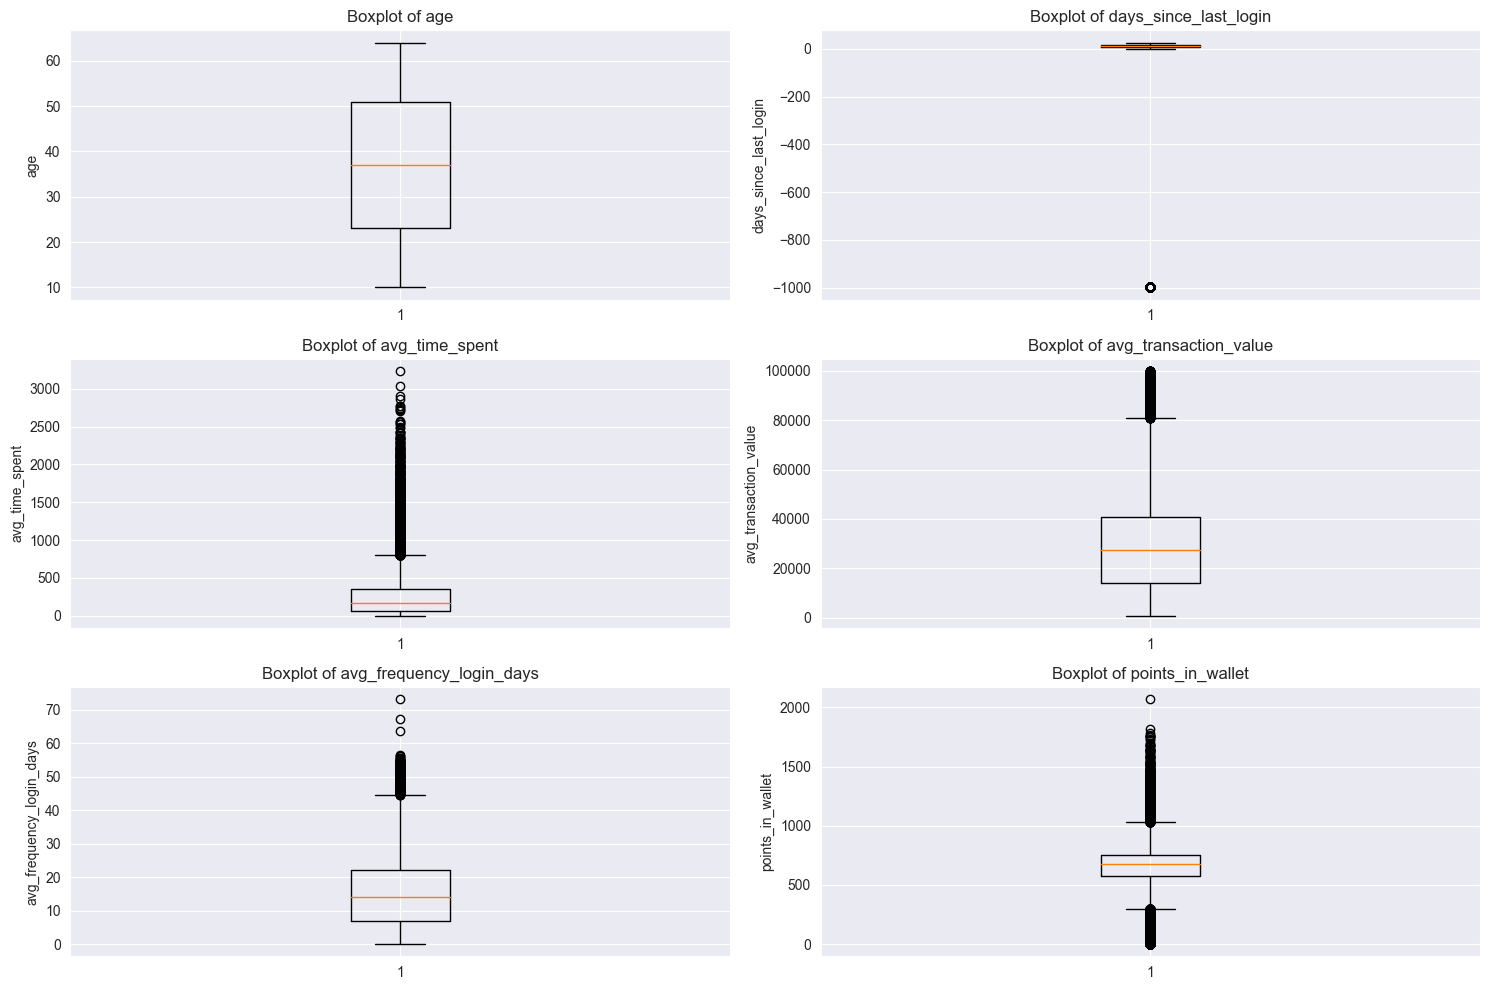

In [ ]:
# membuat canvas
fig, axes = plt.subplots(3,2, figsize=(15, 10))

# membuat box plot untuk melihat outlier pada data numerikal
for i, col in enumerate(featnum_cols):
    ax = axes[i // 2, i % 2]
    ax.boxplot(df_drop[col])
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)
    ax.set_xticklabels(ax.get_xticklabels())
    ax.grid(True, color='white')  # grid untuk memudahkan visualisasi
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

Ditemukan adanya outlier di hampir seluruh kolom numerikal. Pada bagian *modelling* akan ditelusuri lebih lanjut mengenai teknik handling yang paling cocok untuk kolom-kolom ini.

### Conclusion

Dari hasil eksplorasi data, kita telah mengetahui bahwa:
- Target merupakan data kategorikal yang terdiri atas dua kategori atau `biner`
- Beberapa baris yang memiliki anomali telah di bersihkan.
- Beberapa kolom yang tidak berkorelasi seperti 'user_id' telah disingkirkan.
- Beberapa fitur memiliki hubungan linear terhadap target; 'avg_transaction_value', 'feedback', 'membership_category', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', dan beberapa fitur lainnya. 
- Beberapa fitur belum terlihat korelasinya dengan target, diantaranya adalah; 'age', 'internet_option', 'gender', dan sebagainya.
- Ukuran data termasuk sedang karena memiliki kurang lebih 35,000 baris. 
- Beberapa data belum dilakukan penanganan karena akan dilakukan pada bagian pre-processing data.

Hasil eksplorasi ini kemudian akan menentukan model serta rekomendasi yang akan kami berikan kepada perusahaan. 

# V. Feature Engineering

### Split Train Test

In [60]:
# split fitur dan target
X = df_pos_drop.drop(['churn_risk_score', 'feedback'], axis = 1)
y = df_pos_drop['churn_risk_score']

In [ ]:
# split fitur dan target
X = df_pos_drop.drop(['churn_risk_score'], axis = 1)
y = df_pos_drop['churn_risk_score']

In [61]:
# split train, val, dan test

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size = 0.15, random_state = 6, stratify= y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size = 0.15, random_state = 6, stratify= y_train_val)

In [62]:
print('Train size: ',X_train.shape)
print('Val size: ',X_val.shape)
print('Test size: ',X_test.shape)

Train size:  (25282, 17)
Val size:  (4462, 17)
Test size:  (5249, 17)


### Handling Missing Values

In [63]:
# cek mmissing values pada data train
X_train.isnull().sum()

age                                0
gender                            39
region_category                 3732
membership_category                0
joined_through_referral         3708
preferred_offer_types            207
medium_of_operation             3621
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
dtype: int64

In [64]:
# cek mmissing values pada data va
X_val.isnull().sum()

age                               0
gender                            4
region_category                 682
membership_category               0
joined_through_referral         691
preferred_offer_types            26
medium_of_operation             672
internet_option                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
dtype: int64

In [65]:
# cek mmissing values pada data test
X_test.isnull().sum()

age                               0
gender                           10
region_category                 725
membership_category               0
joined_through_referral         740
preferred_offer_types            44
medium_of_operation             817
internet_option                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
dtype: int64

Terlihat ada missing value pada kolom 'gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation'. Kami mengansumsikan bahwa data tersebut memiliki kondisi `MAR (Missing at Random)`. Kondisi ini mengacu pada situasi di mana kemungkinan hilangnya suatu variabel terkait dengan data yang diamati tetapi tidak dengan nilai yang hilang itu sendiri. Hal ini dikatakan karena kami tidak menemukan hubungan antara baris yang hilang dengan kategori tertentu ataupun transaksi tertentu. Oleh karena itu, akan dilakukan imputasi sesuai dengan bentuk data (skewed) yakni imputasi dengan nilai median. 

### Pipeline

Pada bagian ini akan dilakukan pembuatan pipeline untuk pre-processing data (transformasi, scaling, encoding, dan sebagainya). Berikut adalah sedikit penjelasan dalam penggunaan tiap transformer:
- MinMaxScaler: Pemilihan jenis scaler standar karena asumsi mayoritas data berbentuk skewed, sehingga mungkin akan lebih cocok jika seluruh data numerik dijadikan ke dalam rentang 0-1.
- Imputer median (numerikal): Asumsi karena data skewed
- Winsorizer iqr: Asumsi penangan outlier dengan tukey's rule karena data skewed
- Imputer most frequent (kategorikal): Asumsi menggunakan modus karena dianggap sebagai data yang paling mewakilkan. Walaupun begitu, untuk gender sebenarnya dapat dilakukan imputasi lainnya seperti random value agar tidak menimbulkan bias pada suatu gender. 

In [82]:
# pendefinisian kolom ordinal dan nominal
ord_cols = ['membership_category']
ohe_cols = ['gender', 'region_category','joined_through_referral', 'preferred_offer_types', 
                    'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status']

In [84]:
# pipeline untuk numerikal
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
    ('scaler', MinMaxScaler())])

# pipeline untuk ordinal
ord_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories=[['No Membership', 'Basic Membership', 'Silver Membership', 
                                            'Gold Membership','Premium Membership','Platinum Membership']]))])

# pipeline untuk nominal (OHE)
ohe_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())])

# menggabungkan pipeline
final_pipeline = ColumnTransformer(
    transformers=[('num', num_pipeline, featnum_cols),
                 ('cat_ord', ord_pipeline, ord_cols),
                 ('cat_nom', ohe_pipeline, ohe_cols)])

In [85]:
# fit and transform

X_train_trns = final_pipeline.fit_transform(X_train)
X_val_trns = final_pipeline.transform(X_val)
X_test_trns = final_pipeline.transform(X_test)
X_train_trns.shape # jumlah kolom akan berubah

(25282, 34)

Data yang sudah ditransformasi ke dalam bentuk array kemudian juga akan dibuat menjadi bentuk dataframe. Hal ini diperlukan untuk kepentingan *feature selection* dan kepentingan lainnya. 

In [110]:
# melihat bentuk transformasi X
X_train_trns

array([[0.72222222, 0.8       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.74074074, 0.52      , 0.31930632, ..., 0.        , 0.        ,
        0.        ],
       [0.44444444, 0.12      , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2962963 , 0.04      , 0.25103073, ..., 0.        , 0.        ,
        1.        ],
       [0.59259259, 0.44      , 0.04010881, ..., 0.        , 0.        ,
        1.        ],
       [0.83333333, 0.44      , 0.20157437, ..., 0.        , 0.        ,
        1.        ]])

In [125]:
# membuat list kosong
feature_names = []

# nama fitur numerik (sejumlah sama)
print('Numeric Feature Names:', featnum_cols)
feature_names.extend(featnum_cols)
# nama fitur ordinal (sejumlah sama)
feature_names =  feature_names + ['membership_category']
# untuk nama fitur nominal, diperlukan ekstraksi dari encoder
ohe_feature_names = final_pipeline.named_transformers_['cat_nom']['encoder'].get_feature_names_out(ohe_cols)
print('Nominal Feature Names:', ohe_feature_names)
feature_names.extend(ohe_feature_names)

# membuat dataframe
X_train_trns_df = pd.DataFrame(data=X_train_trns, columns=feature_names)

Numeric Feature Names: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Nominal Feature Names: ['gender_F' 'gender_M' 'region_category_City' 'region_category_Town'
 'region_category_Village' 'joined_through_referral_No'
 'joined_through_referral_Yes'
 'preferred_offer_types_Credit/Debit Card Offers'
 'preferred_offer_types_Gift Vouchers/Coupons'
 'preferred_offer_types_Without Offers' 'medium_of_operation_Both'
 'medium_of_operation_Desktop' 'medium_of_operation_Smartphone'
 'internet_option_Fiber_Optic' 'internet_option_Mobile_Data'
 'internet_option_Wi-Fi' 'used_special_discount_No'
 'used_special_discount_Yes' 'offer_application_preference_No'
 'offer_application_preference_Yes' 'past_complaint_No'
 'past_complaint_Yes' 'complaint_status_No Information Available'
 'complaint_status_Not Applicable' 'complaint_status_Solved'
 'complaint_status_Solved in Follow-up' 'complaint_status_Unsolved']


In [127]:
# melihat kolom yang baru terbentuk
X_train_trns_df

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,membership_category,gender_F,gender_M,region_category_City,region_category_Town,region_category_Village,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved
0,0.722222,0.80,0.000000,0.182431,0.162791,0.000000,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.740741,0.52,0.319306,0.385371,0.232558,0.591312,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.444444,0.12,1.000000,0.572483,0.000000,0.345608,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.481481,0.36,0.097969,0.327609,0.139535,0.418359,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.129630,0.08,0.409542,0.117124,0.511628,0.541053,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25277,0.537037,0.88,0.355592,0.020097,0.418605,0.638025,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
25278,0.222222,0.28,0.093624,0.275733,0.627907,0.338625,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
25279,0.296296,0.04,0.251031,0.565896,0.372093,0.567337,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
25280,0.592593,0.44,0.040109,0.167545,0.325581,0.533093,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [139]:
# split numerikal kategorikal dataframe
X_train_trns_num = X_train_trns_df[featnum_cols]
X_train_trns_cat = X_train_trns_df.drop(columns=featnum_cols)

### Feature Selection

Akan dilakukan beberapa teknik untuk pemilihan fitur. Disini kami akan melakukan pemilihan fitur dengan Chi-square, Pearson, dan ANOVA.

**ANOVA**

In [143]:
# melakukan pemilihan ANOVA untuk data kategorikal
selector = SelectKBest(score_func=f_classif, k=4) 

selector.fit(X_train_trns_cat, y_train)
df_scores = pd.DataFrame({'Cat Feature': X_train_trns_cat.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

# mengurutkan data
df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores.head(20)

,Cat Feature,Score,p-value
0,membership_category,32596.127899,0.0000
10,preferred_offer_types_Without Offers,36.023883,0.0000
9,preferred_offer_types_Gift Vouchers/Coupons,27.956854,0.0000
6,joined_through_referral_No,14.856259,0.0001
7,joined_through_referral_Yes,14.856259,0.0001
20,offer_application_preference_Yes,10.853544,0.0010
19,offer_application_preference_No,10.853544,0.0010
5,region_category_Village,8.099381,0.0044
18,used_special_discount_Yes,5.092563,0.0240
17,used_special_discount_No,5.092563,0.0240


Tabel di atas menunjukkan bahwa seluruh kolom kategorikal hingga 'gender' memiliki hubungan dengan target. Hal tersebut terlihat dari p-value yang kurang dari 0.05. Sementara itu, score yang besar akan menandakan keterhubungan yang lebih besar juga; ditandai dengan kolom 'membership_category' yang memiliki value score tertinggi. Sementara itu, untuk kolom 'internet_option' hingga kolom lain yang tidak ditunjukkan dalam tabel ini, berarti tidak memiliki korelasi yang signifikan dengan target.

In [147]:
# melakukan pemilihan ANOVA untuk data numerikal
selector = SelectKBest(score_func=f_classif, k=4) 

selector.fit(X_train_trns_num, y_train)
df_scores = pd.DataFrame({'num Feature': X_train_trns_num.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

# mengurutkan data
df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores.head(20)

,num Feature,Score,p-value
5,points_in_wallet,1966.774138,0.0000
3,avg_transaction_value,1163.166177,0.0000
4,avg_frequency_login_days,321.875548,0.0000
2,avg_time_spent,8.598246,0.0034
1,days_since_last_login,8.319764,0.0039
0,age,0.463721,0.4959


Sementara itu, masih dengan uji ANOVA, terlihat bahwa seluruh kolom numerikal kecuali 'age' memiliki korelasi terhadap target karena memiliki p-value kurang dari 0.05. Hal ini memberikan pengetahuan yang `menarik, karena sebelumnya di bagian EDA `kita menemukan bahwa kolom 'days_since_last_login' tidak memiliki korelasi yang signifikan dengan target bila dilihat melalui uji Pearson. 

**Chi-Square**

In [153]:
# melakukan chi-square terhadap target
chi_scores = []
for column in X_train_trns_cat.columns:
    contingency_table = pd.crosstab(X_train_trns_cat[column], y_train)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_scores.append((column, p))

# sort berdasarkan p-value
chi_scores.sort(key=lambda x: x[1]) #<0.05 berkorelasi

# print
for chi in chi_scores:
    print(f"Feature: {chi[0]}, p-value: {chi[1]}")

Feature: preferred_offer_types_Without Offers, p-value: 0.05090526750550948
Feature: preferred_offer_types_Gift Vouchers/Coupons, p-value: 0.14858808565771392
Feature: internet_option_Mobile_Data, p-value: 0.21984451307522446
Feature: membership_category, p-value: 0.22574640298031606
Feature: joined_through_referral_No, p-value: 0.24006523481868572
Feature: joined_through_referral_Yes, p-value: 0.24006523481868577
Feature: complaint_status_Unsolved, p-value: 0.24205763845883405
Feature: region_category_Town, p-value: 0.25819405107260973
Feature: offer_application_preference_No, p-value: 0.3444508276438858
Feature: offer_application_preference_Yes, p-value: 0.3444508276438858
Feature: medium_of_operation_Both, p-value: 0.37612362923342035
Feature: internet_option_Wi-Fi, p-value: 0.39177249730773644
Feature: region_category_Village, p-value: 0.4898947257548668
Feature: region_category_City, p-value: 0.49043854168715917
Feature: medium_of_operation_Desktop, p-value: 0.6249609694443745
Fea

Diketahui bahwa menurut Chi-Square, sepertinya hanya 'preferred_offer_types_Without Offers' yang berkorelasi dengan target karena memiliki value kurang daripada 0.05.

**VIF**

In [154]:
# membuat fungsi VIF
def calc_vif(X):
    '''
    insert value = dataframe
    hasil tinggi memiliki multicollinearity tinggi
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=True)
    return(vif)
# kalkulasi vif
calc_vif(X_train_trns_cat)   

,variables,VIF
0,membership_category,1.004935e+00
20,offer_application_preference_Yes,8.732751e+04
1,gender_F,2.434350e+05
24,complaint_status_Not Applicable,2.886073e+05
17,used_special_discount_No,9.843900e+05
14,internet_option_Fiber_Optic,1.171870e+06
6,joined_through_referral_No,1.235607e+06
25,complaint_status_Solved,1.358539e+06
7,joined_through_referral_Yes,1.509466e+06
13,medium_of_operation_Smartphone,1.634963e+06


Bila dilihat menggunakan VIF, diketahui bahwa seluruh fitur kecuali 'membership_category' memiliki VIF lebih dari 10. Hal ini dapat menandakan adanya *multicollinearity*--yaitu sejauh mana variabel independen dalam model linear berkorelasi satu sama lain.

**Final Feature**

Kami telah menemukan beberapa keunikan dimana beberapa uji memberikan hasil yang berbeda-beda. Selain itu, ada juga keunikan dimana hasil fitur yang belum ditransformasikan memiliki korelasi yang berbeda jika dibandingkan dengan fitur yang telah ditransformasikan. 
Kami tidak ingin mereferensikan hanya salah satu selektor yang dapat memungkinkan timbulnya bias. Selain itu, kami juga telah menyingkirkan kolom yang menurut kami (dengan pengetahuan domain) tidak berkorelasi dibagian EDA. Oleh karena itu, hingga tahap ini, seluruh `fitur akan dipertahankan` untuk dilanjutkan ke dalam pembuatan model. Namun untuk bahan evaluasi, berikut adalah kesimpulan dari fitur-fitur utama yang disampaikan oleh beberapa uji diatas:
- 'membership_category' (skor tertinggi) serta kolom kategorikal lainnya menurut ANOVA.
- Seluruh kolom numerikal kecuali 'age' menurut ANOVA.
- 'preferred_offer_types_Without Offers' menurut Chi-square.

# VI. Modelling

### Pipeline Preparation

Melakukan preparasi dengan membentuk `tensorflow pipeline`. Pada pipeline ini, ada beberapa hal yang kami atur yakni:
- Batch 16.
- Repeat sebanyak dua kali.
- Tidak menggunakan shuffle untuk menghindari hasil yang berubah ketika file di re-run.

In [180]:
# define tensorflow pipeline
Xy_train_tpipe = tf.data.Dataset.from_tensor_slices((X_train_trns,y_train)).batch(16).repeat(2).prefetch(tf.data.AUTOTUNE)
Xy_test_tpipe = tf.data.Dataset.from_tensor_slices((X_test_trns,y_test)).batch(16)
Xy_val_tpipe = tf.data.Dataset.from_tensor_slices((X_val_trns,y_val)).batch(16)

In [158]:
# define variabel seed
seed = 6
np.random.seed(seed)
tf.random.set_seed(seed)

Untuk selanjutnya, akan dilakukan pemodelan untuk model sequential yang kemudian akan dikembangkan (*improve*), dan disusul dengan pemodelan model functional yang akan dikembangkan juga. 

## I) Default Sequential

### Model Definition
Bagian ini akan mencakup pendefinisian model berisi arsitektur model, optimiser yang digunakan, dan sebgainya. 

Pengaturan yang digunakan:

- Neuron: Pada hal ini, kami akan menggunakan referensi dalam penentuan jumlah neuron awal (sumber: [stackexchange](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)). Dari perhitungan tersebut, kami mendapatkan bahwa untuk data dengan fitur dan baris sekian, dapat dicoba menggunakan 62 neuron dalam model ANN. Kami akan mencoba kurang lebih 50-60 neuron untuk percobaan pertama.
- Hidden layer: Menggunakan empat hidden layer dengan neuron terbanyak pada hidden layer pertama (secara berurutan: 32, 16, 8, 4).
- Menggunakan relu dan HeNormal.
- Menggunakan aktivasi sigmoid untuk klasifikasi biner.
- Menggunakan loss binary_crossentropy untuk klasifikasi biner. 
- Menggunakan optimizer adam.
- Menggunakan metrik binary accuracy, recall, dan precision. 

In [376]:
# clear session
tf.keras.backend.clear_session()

In [377]:
# define model
model_sequential_def = Sequential()
model_sequential_def.add(Dense(32, # layer pertama
                           activation = 'relu',
                           kernel_initializer = tf.keras.initializers.HeNormal(seed),
                           input_shape = (34,))) # 34 sesuai jumlah fitur
model_sequential_def.add(Dense(16, # layer kedua
                           activation = 'selu',
                           kernel_initializer = tf.keras.initializers.LecunNormal(seed),
                           input_shape = (34,))) 
model_sequential_def.add(Dense(8, # layer ketiga
                           activation = 'selu',
                           kernel_initializer = tf.keras.initializers.LecunNormal(seed),
                           input_shape = (34,))) 
model_sequential_def.add(Dense(4,
                           activation = 'selu',
                           kernel_initializer = tf.keras.initializers.LecunNormal(seed),
                           input_shape = (34,)))                                                      
model_sequential_def.add(Dense(1, # output layer
                           activation = 'sigmoid',
                           kernel_initializer = tf.keras.initializers.GlorotNormal(seed)))    
# compile
model_sequential_def.compile(loss = 'binary_crossentropy', 
                         optimizer = 'adam',
                         metrics = [tf.keras.metrics.BinaryAccuracy(threshold = .7), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
                 

In [378]:
# melihat summary model
model_sequential_def.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1120      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,825
Trainable params: 1,825
Non-trainable params: 0
_________________________________________________________________


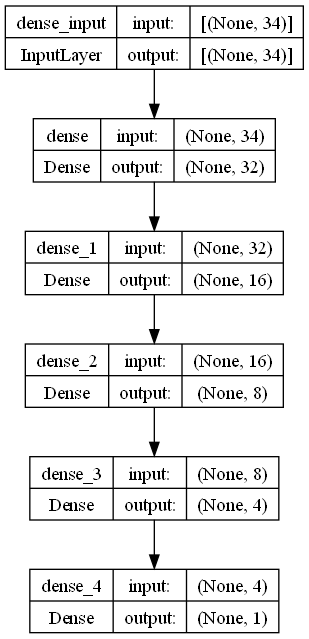

In [379]:
# plot layers
tf.keras.utils.plot_model(model_sequential_def, show_shapes = True)

### Model Training

In [380]:
# define callbacks early stop agar model membatasi running ketika epoch sudah optimal
cb_es = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 6, restore_best_weights=True)

In [606]:
# train model
%time
history_seq_def = model_sequential_def.fit(Xy_train_tpipe,
                                   epochs = 100,
                                   validation_data = (Xy_val_tpipe),
                                   batch_size = 500,
                                   callbacks = cb_es) # di define di awal model definion

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/100
3162/3162 [==============================] - 5s 2ms/step - loss: 0.1282 - binary_accuracy: 0.9421 - recall: 0.9549 - precision: 0.9454 - val_loss: 0.2613 - val_binary_accuracy: 0.9195 - val_recall: 0.9398 - val_precision: 0.9170
Epoch 2/100
3162/3162 [==============================] - 5s 2ms/step - loss: 0.1277 - binary_accuracy: 0.9424 - recall: 0.9556 - precision: 0.9454 - val_loss: 0.2654 - val_binary_accuracy: 0.9180 - val_recall: 0.9378 - val_precision: 0.9161
Epoch 3/100
3162/3162 [==============================] - 6s 2ms/step - loss: 0.1278 - binary_accuracy: 0.9423 - recall: 0.9546 - precision: 0.9453 - val_loss: 0.2734 - val_binary_accuracy: 0.9189 - val_recall: 0.9365 - val_precision: 0.9160
Epoch 4/100
3162/3162 [==============================] - 5s 2ms/step - loss: 0.1275 - binary_accuracy: 0.9428 - recall: 0.9550 - precision: 0.9456 - val_loss: 0.2701 - val_binary_accuracy: 0.9180 - val_recall: 0.9328 - val_precision: 0.92

Terhenti pada epoch optimal 74.

### Model Evaluation

In [607]:
# membuat data frame dari hasil training
history_seq_def_df = pd.DataFrame(history_seq_def.history)

In [608]:
#melihat isi dataframe
history_seq_def_df.tail(5)

,loss,binary_accuracy,recall,precision,val_loss,val_binary_accuracy,val_recall,val_precision
69,0.120503,0.945969,0.956070,0.950122,0.306812,0.918198,0.928216,0.924762
70,0.119631,0.945297,0.956875,0.950749,0.319254,0.917078,0.930705,0.922666
71,0.119681,0.945752,0.956509,0.950386,0.322839,0.916181,0.925726,0.924959
72,0.120540,0.945712,0.955630,0.951277,0.315807,0.917302,0.924066,0.927530
73,0.119430,0.945732,0.955740,0.950175,0.314162,0.919991,0.934855,0.922604


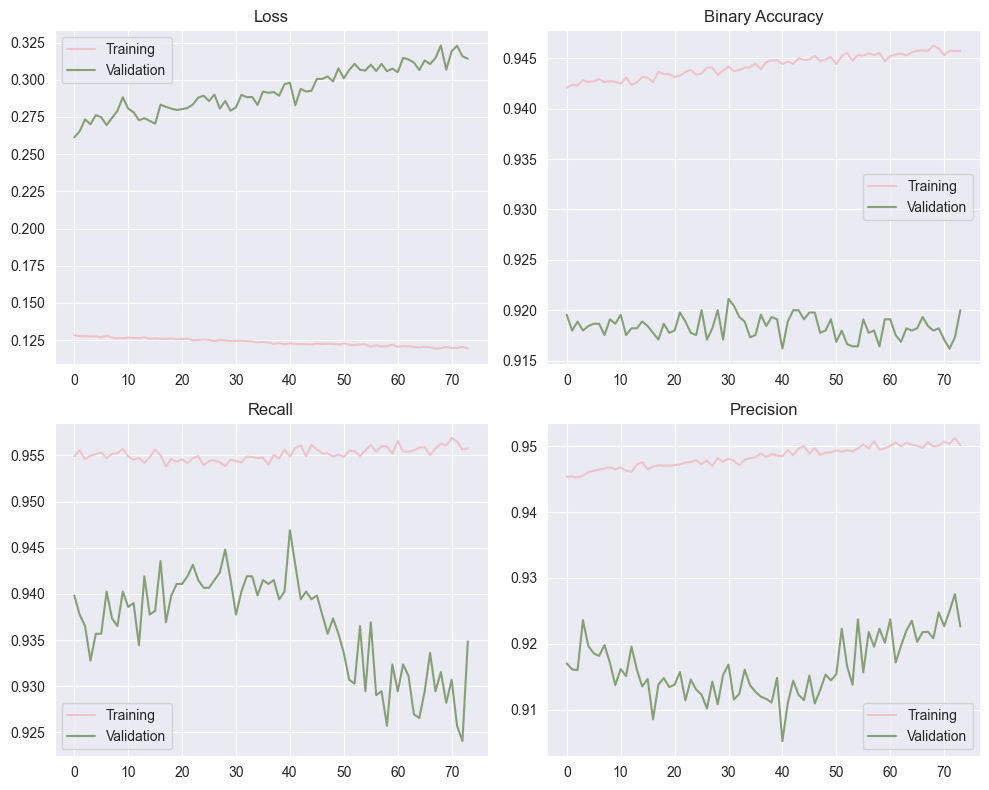

In [609]:
# membuat canvas 2*2
sns.set_style({'axes.grid': True})
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# loss
axes[0, 0].plot(history_seq_def_df['loss'], color = '#EFc3ca')
axes[0, 0].plot(history_seq_def_df['val_loss'], color = '#869f77')
axes[0, 0].set_title('Loss')
axes[0, 0].legend(['Training', 'Validation'])

# binary accuracy
axes[0, 1].plot(history_seq_def_df['binary_accuracy'],color = '#EFc3ca')
axes[0, 1].plot(history_seq_def_df['val_binary_accuracy'],color = '#869f77')
axes[0, 1].set_title('Binary Accuracy')
axes[0, 1].legend(['Training', 'Validation'])

# Recall
axes[1, 0].plot(history_seq_def_df['recall'],color = '#EFc3ca')
axes[1, 0].plot(history_seq_def_df['val_recall'],color = '#869f77')
axes[1, 0].set_title('Recall')
axes[1, 0].legend(['Training', 'Validation'])

# Precision
axes[1, 1].plot(history_seq_def_df['precision'],color = '#EFc3ca')
axes[1, 1].plot(history_seq_def_df['val_precision'],color = '#869f77')
axes[1, 1].set_title('Precision')
axes[1, 1].legend(['Training', 'Validation'])

# show plot
plt.tight_layout()
plt.show()

In [610]:
# evaluation
y_pred_seq_def = model_sequential_def.predict(X_test_trns)
y_pred_seq_def = np.where(y_pred_seq_def >=0.5, 1,0 )
print (classification_report(y_test,y_pred_seq_def))

165/165 [==============================] - 3s 941us/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2414
           1       0.93      0.92      0.93      2835

    accuracy                           0.92      5249
   macro avg       0.92      0.92      0.92      5249
weighted avg       0.92      0.92      0.92      5249



Hasil report menunjukkan nilai yang cukup baik, namun grafik menunjukkan performa yang belum seimbang. Beberapa evaluasi yang kita dapatkan: 
- Model cenderung *overfit* (terlihat dari jarak pada loss), menjadi masukan untuk mengurangi neuron atau layer pada saat evaluasi (misalnya menggunakan dropout atau mengurangi kompleksitas arsitektur).
- Meningkatkan nilai epoch karena diketahui sepertinya model masih membutuhkan training (tidak terhenti/ early stop)
- Mencoba mengganti activation function
- Mencoba mengganti optimizer

## II) Improved Sequential

### Model Definition

Pendefinisian model akan menyesuaikan masukan dari pemodelan sebelumnya. Pengaturan yang digunakan:

- Menambahkan drop-out dengan asumsi akan efektif menangani model *overfit* (Dropout mengatur sebagian unit input (neuron) menjadi nol pada setiap langkah pelatihan. Hal ini efektif menghilangkan sebagian koneksi dalam model dan memaksa jaringan untuk belajar dengan mandiri).
- Karena model *overfit*, hidden layer dikurangi menjadi dua (secara berurutan: 16, 8)
- Menggunakan relu dan HeNormal.
- Menggunakan optimizer Adamax (merupakan ekstensi adam yang dianggap lebih stabil)
- Menggunakan metrik binary accuracy, recall, dan precision. 

In [637]:
# clear session
tf.keras.backend.clear_session()

In [638]:
# define model
model_sequential_imp = Sequential()
model_sequential_imp.add(Dense(16, #mengurangi jumlah neuron
                           activation = 'relu',
                           kernel_initializer = tf.keras.initializers.HeNormal(seed),
                           input_shape = (34,),# 34 sesuai jumlah fitur                         
                           kernel_regularizer='l1'))
model_sequential_imp.add(tf.keras.layers.Dropout(0.1)) # add dropout                                
model_sequential_imp.add(Dense(8, 
                           activation = 'relu',
                           kernel_initializer = tf.keras.initializers.HeNormal(seed),
                           input_shape = (34,)))     
model_sequential_imp.add(tf.keras.layers.Dropout(0.1)) # add dropout
model_sequential_imp.add(Dense(1, # output layer
                           activation = 'sigmoid',
                           kernel_initializer = tf.keras.initializers.GlorotNormal(seed)))    
# compile
model_sequential_imp.compile(loss = 'binary_crossentropy', 
                         optimizer = 'Adamax',
                         metrics = [tf.keras.metrics.BinaryAccuracy(threshold = .7), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
                 

In [643]:
# melihat summary model
model_sequential_imp.build(input_shape=(None, 43))
model_sequential_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                560       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


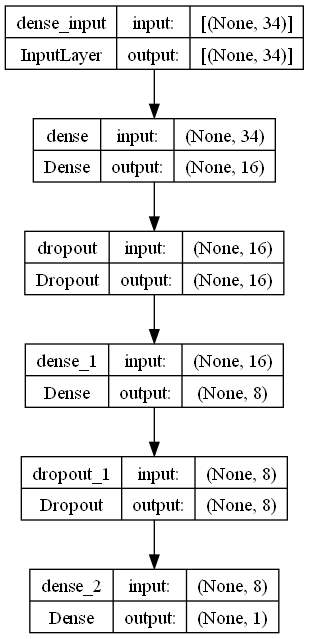

In [644]:
# plot layers
tf.keras.utils.plot_model(model_sequential_imp, show_shapes = True)

### Model Training

In [286]:
# define callbacks early stop agar model membatasi running ketika epoch sudah optimal
cb_es_val = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 8, restore_best_weights=True)

In [639]:
# train model
%time
history_seq_imp = model_sequential_imp.fit(Xy_train_tpipe,
                                   epochs = 100,
                                   validation_data = (Xy_val_tpipe),
                                   batch_size = 500,
                                   callbacks = cb_es_val)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/100
3162/3162 [==============================] - 11s 2ms/step - loss: 0.7754 - binary_accuracy: 0.7894 - recall: 0.8199 - precision: 0.8296 - val_loss: 0.4359 - val_binary_accuracy: 0.8521 - val_recall: 0.8187 - val_precision: 0.8738
Epoch 2/100
3162/3162 [==============================] - 8s 2ms/step - loss: 0.4118 - binary_accuracy: 0.8450 - recall: 0.8069 - precision: 0.8793 - val_loss: 0.3641 - val_binary_accuracy: 0.8523 - val_recall: 0.8021 - val_precision: 0.8933
Epoch 3/100
3162/3162 [==============================] - 7s 1ms/step - loss: 0.3704 - binary_accuracy: 0.8478 - recall: 0.8033 - precision: 0.8862 - val_loss: 0.3437 - val_binary_accuracy: 0.8523 - val_recall: 0.7759 - val_precision: 0.9230
Epoch 4/100
3162/3162 [==============================] - 7s 1ms/step - loss: 0.3524 - binary_accuracy: 0.8496 - recall: 0.8045 - precision: 0.8900 - val_loss: 0.3354 - val_binary_accuracy: 0.8523 - val_recall: 0.7867 - val_precision: 0.9

### Model Evaluation

In [640]:
# create dataframe
history_seq_imp_df = pd.DataFrame(history_seq_imp.history)
history_seq_imp_df.tail(3)

,loss,binary_accuracy,recall,precision,val_loss,val_binary_accuracy,val_recall,val_precision
97,0.250783,0.908967,0.909577,0.919201,0.223215,0.918198,0.936929,0.916768
98,0.251069,0.910134,0.908808,0.920706,0.224092,0.915957,0.933610,0.919493
99,0.251309,0.909026,0.908479,0.920885,0.225384,0.921112,0.940249,0.911871


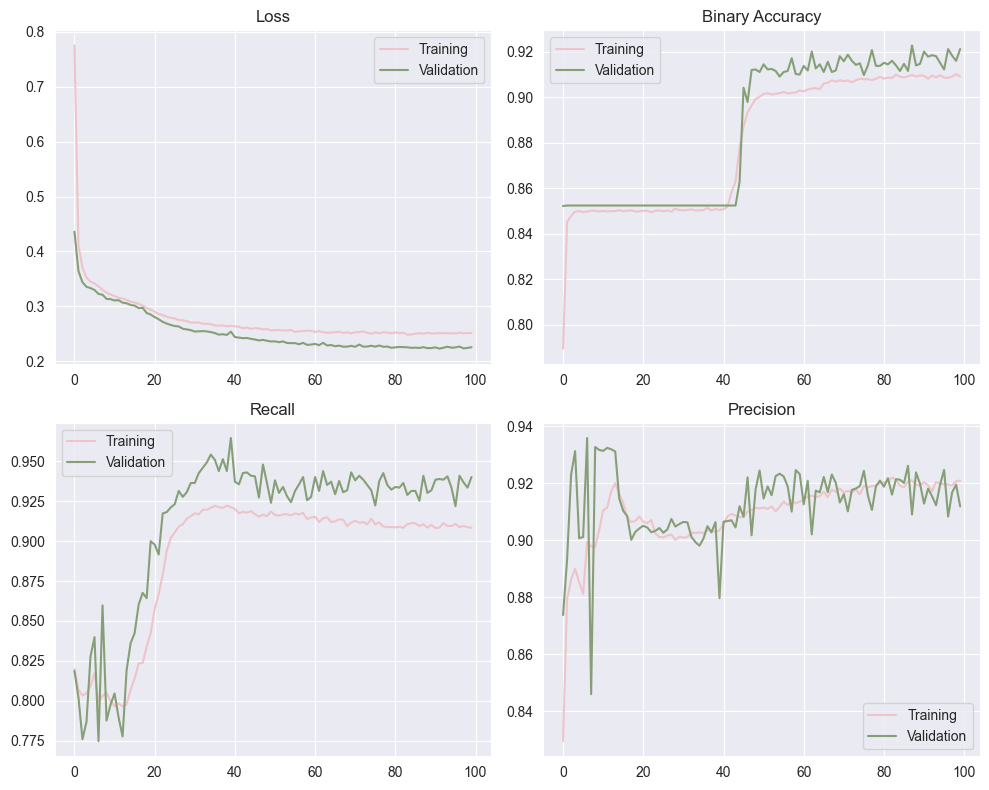

In [641]:
# membuat canvas 2*2
sns.set_style({'axes.grid': True})
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# loss
axes[0, 0].plot(history_seq_imp_df['loss'], color = '#EFc3ca')
axes[0, 0].plot(history_seq_imp_df['val_loss'], color = '#869f77')
axes[0, 0].set_title('Loss')
axes[0, 0].legend(['Training', 'Validation'])

# binary accuracy
axes[0, 1].plot(history_seq_imp_df['binary_accuracy'],color = '#EFc3ca')
axes[0, 1].plot(history_seq_imp_df['val_binary_accuracy'],color = '#869f77')
axes[0, 1].set_title('Binary Accuracy')
axes[0, 1].legend(['Training', 'Validation'])

# Recall
axes[1, 0].plot(history_seq_imp_df['recall'],color = '#EFc3ca')
axes[1, 0].plot(history_seq_imp_df['val_recall'],color = '#869f77')
axes[1, 0].set_title('Recall')
axes[1, 0].legend(['Training', 'Validation'])

# Precision
axes[1, 1].plot(history_seq_imp_df['precision'],color = '#EFc3ca')
axes[1, 1].plot(history_seq_imp_df['val_precision'],color = '#869f77')
axes[1, 1].set_title('Precision')
axes[1, 1].legend(['Training', 'Validation'])

# show plot
plt.tight_layout()
plt.show()

In [642]:
# evaluation
y_pred_seq_imp = model_sequential_imp.predict(X_test_trns)
y_pred_seq_imp = np.where(y_pred_seq_imp >=0.5, 1,0 )
print (classification_report(y_test,y_pred_seq_imp))

165/165 [==============================] - 4s 907us/step
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2414
           1       0.92      0.93      0.93      2835

    accuracy                           0.92      5249
   macro avg       0.92      0.92      0.92      5249
weighted avg       0.92      0.92      0.92      5249



Ada *improvement* yang terlihat dari recall, precision, dan f1-score yang lebih mengarah pada index 1/ *churn* (yang ingin kita maksimalkan). Terlihat juga karena adanya pengurangan layer dan mungkin karena adanya penambahan dropout, model cenderung lebih `good-fit`. Untuk selanjutnya, akan dilakukan percobaan pembuatan model functional. 

## III) Default Functional

### Model Definition

Berikut adalah pengaturan yang digunakan untuk model fungsional:

- Menggunakan dua hidden layer (secara berurutan: 32 dan 16 neuron)
- Menggunakan relu dan HeNormal pada kedua hidden layer 
- Menggunakan optimizer adam

In [301]:
# clear session
tf.keras.backend.clear_session()

In [402]:
# create functional  model
input_layer = Input(shape=(34,))
hidden_layer_1 = Dense(32,
                        activation = 'relu',
                        kernel_initializer = tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(16,
                        activation = 'relu',
                        kernel_initializer = tf.keras.initializers.HeNormal(seed))(hidden_layer_1)                      
concat_layer = concatenate((input_layer, hidden_layer_2))
output_layer = Dense(1, activation = 'sigmoid', kernel_initializer = tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional_def = Model(inputs = input_layer, outputs = output_layer)

# compile
model_functional_def.compile(loss = 'binary_crossentropy',
                         optimizer = 'adam',
                         metrics = [tf.keras.metrics.BinaryAccuracy(threshold = .7), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_functional_def.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 32)           1120        ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 16)           528         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 50)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

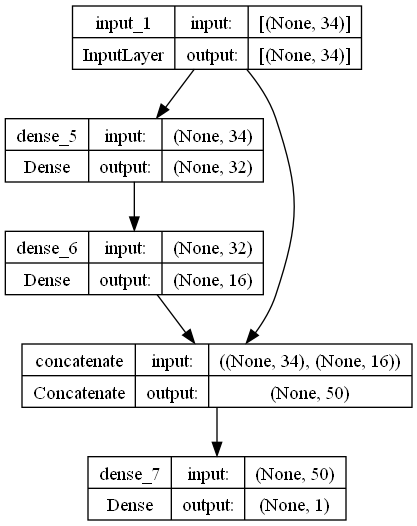

In [403]:
# plot
tf.keras.utils.plot_model(model_functional_def, show_shapes = True)

### Model Training

In [428]:
# train model
%time
history_func_def = model_functional_def.fit(Xy_train_tpipe,
                                   epochs = 50,
                                   validation_data = (Xy_val_tpipe),
                                   batch_size = 1000)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/50
3162/3162 [==============================] - 5s 2ms/step - loss: 0.1699 - binary_accuracy: 0.9264 - recall_1: 0.9379 - precision_1: 0.9302 - val_loss: 0.1946 - val_binary_accuracy: 0.9211 - val_recall_1: 0.9473 - val_precision_1: 0.9114
Epoch 2/50
3162/3162 [==============================] - 5s 1ms/step - loss: 0.1687 - binary_accuracy: 0.9272 - recall_1: 0.9389 - precision_1: 0.9312 - val_loss: 0.1941 - val_binary_accuracy: 0.9204 - val_recall_1: 0.9440 - val_precision_1: 0.9144
Epoch 3/50
3162/3162 [==============================] - 5s 1ms/step - loss: 0.1674 - binary_accuracy: 0.9277 - recall_1: 0.9396 - precision_1: 0.9313 - val_loss: 0.1941 - val_binary_accuracy: 0.9218 - val_recall_1: 0.9461 - val_precision_1: 0.9105
Epoch 4/50
3162/3162 [==============================] - 5s 1ms/step - loss: 0.1663 - binary_accuracy: 0.9280 - recall_1: 0.9396 - precision_1: 0.9324 - val_loss: 0.1943 - val_binary_accuracy: 0.9209 - val_recall_1: 0.

### Model Evaluation

In [429]:
# create dataframe
history_func_def_df = pd.DataFrame(history_func_def.history)
history_func_def_df.tail(3)

,loss,binary_accuracy,recall_1,precision_1,val_loss,val_binary_accuracy,val_recall_1,val_precision_1
47,0.147365,0.935329,0.949846,0.937559,0.217308,0.919767,0.952697,0.909307
48,0.147211,0.935784,0.950322,0.937385,0.216597,0.920887,0.953112,0.906472
49,0.147095,0.935962,0.950395,0.937626,0.215495,0.920215,0.951867,0.908155


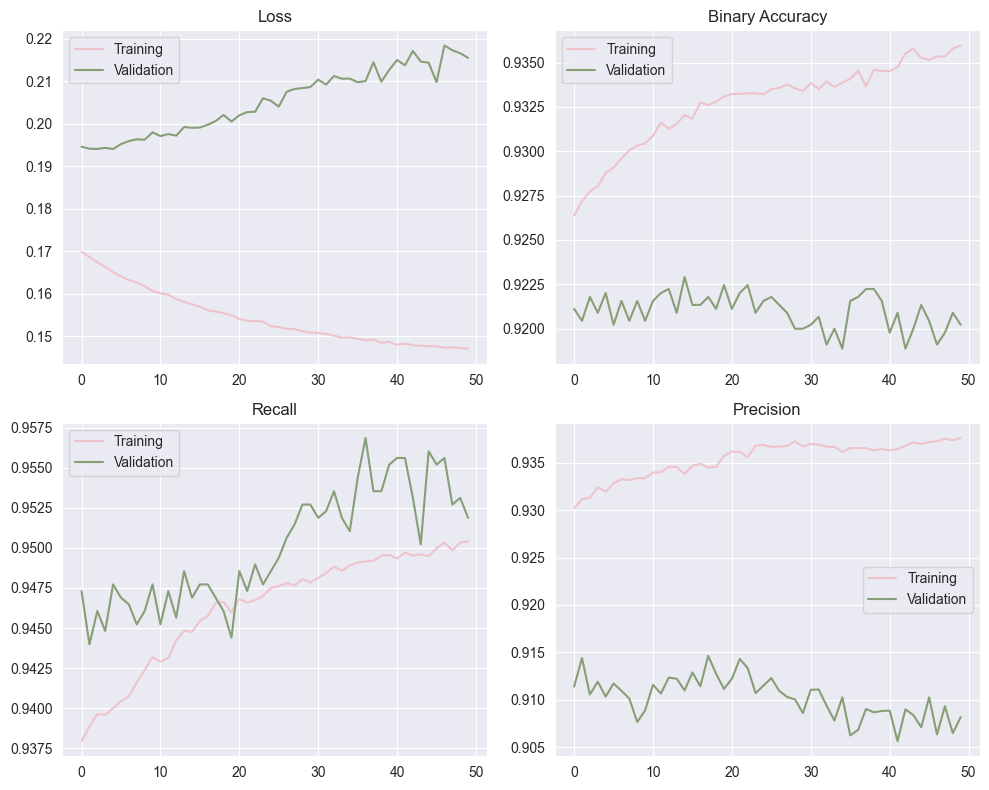

In [508]:
# membuat canvas 2*2
sns.set_style({'axes.grid': True})
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# loss
axes[0, 0].plot(history_func_def_df['loss'], color = '#EFc3ca')
axes[0, 0].plot(history_func_def_df['val_loss'], color = '#869f77')
axes[0, 0].set_title('Loss')
axes[0, 0].legend(['Training', 'Validation'])

# binary accuracy
axes[0, 1].plot(history_func_def_df['binary_accuracy'],color = '#EFc3ca')
axes[0, 1].plot(history_func_def_df['val_binary_accuracy'],color = '#869f77')
axes[0, 1].set_title('Binary Accuracy')
axes[0, 1].legend(['Training', 'Validation'])

# Recall
axes[1, 0].plot(history_func_def_df['recall_1'],color = '#EFc3ca')
axes[1, 0].plot(history_func_def_df['val_recall_1'],color = '#869f77')
axes[1, 0].set_title('Recall')
axes[1, 0].legend(['Training', 'Validation'])

# Precision
axes[1, 1].plot(history_func_def_df['precision_1'],color = '#EFc3ca')
axes[1, 1].plot(history_func_def_df['val_precision_1'],color = '#869f77')
axes[1, 1].set_title('Precision')
axes[1, 1].legend(['Training', 'Validation'])

# show plot
plt.tight_layout()
plt.show()

In [590]:
# evaluation
y_pred_func_def = model_functional_def.predict(X_test_trns)
y_pred_func_def = np.where(y_pred_func_def >=0.5, 1,0 )
print (classification_report(y_test,y_pred_func_def))

165/165 [==============================] - 3s 909us/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2414
           1       0.91      0.94      0.93      2835

    accuracy                           0.92      5249
   macro avg       0.92      0.92      0.92      5249
weighted avg       0.92      0.92      0.92      5249



Beberapa evaluasi yang kita dapatkan: 
- Model cenderung *overfit* (terlihat dari jarak pada loss), menjadi masukan untuk mengurangi neuron atau layer pada saat evaluasi (misalnya menggunakan dropout atau mengurangi kompleksitas arsitektur).
- Sepertinya butuh lebih banyak training/ menambah jumlah epoch.
- Mencoba mengganti activation function.
- Mencoba mengganti optimizer.

## IV) Improved Functional

### Model Definition

Pendefinisian model akan menyesuaikan masukan dari pemodelan sebelumnya. Pengaturan yang digunakan:

- Menambahkan drop-out dengan asumsi akan efektif menangani model *overfit* (Dropout mengatur sebagian unit input (neuron) menjadi nol pada setiap langkah pelatihan. Hal ini efektif menghilangkan sebagian koneksi dalam model dan memaksa jaringan untuk belajar dengan mandiri).
- Karena model *overfit*, hidden layer dikurangi menjadi dua (secara berurutan: 16, 8)
- Menggunakan relu dan HeNormal.
- Menggunakan optimizer Adamax (merupakan ekstensi adam yang dianggap lebih stabil)
- Menggunakan metrik binary accuracy, recall, dan precision. 

In [532]:
# clear session
tf.keras.backend.clear_session()

In [552]:
#create functional  model
input_layer = Input(shape=(34,))
hidden_layer_1 = Dense(16,
                        activation = 'relu',
                        kernel_initializer = tf.keras.initializers.HeNormal(seed))(input_layer)                     
hidden_layer_2 = Dense(8,
                        activation = 'relu',
                        kernel_initializer = tf.keras.initializers.HeNormal(seed))(hidden_layer_1)
concat_layer = concatenate((input_layer, hidden_layer_2))
dropout = tf.keras.layers.Dropout(rate = 0.1)(concat_layer)
output_layer = Dense(1, activation = 'sigmoid', kernel_initializer = tf.keras.initializers.GlorotNormal(seed))(dropout)

model_functional_imp = Model(inputs = input_layer, outputs = output_layer)
model_sequential_imp.add(tf.keras.layers.Dropout(0.1))
# compile
model_functional_imp.compile(loss = 'binary_crossentropy',
                         optimizer = 'Adamax',
                         metrics =[tf.keras.metrics.BinaryAccuracy(threshold = .7), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model_functional_imp.summary()  

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 16)           560         ['input_6[0][0]']                
                                                                                                  
 dense_16 (Dense)               (None, 8)            136         ['dense_15[0][0]']               
                                                                                                  
 concatenate_5 (Concatenate)    (None, 42)           0           ['input_6[0][0]',                
                                                                  'dense_16[0][0]']         

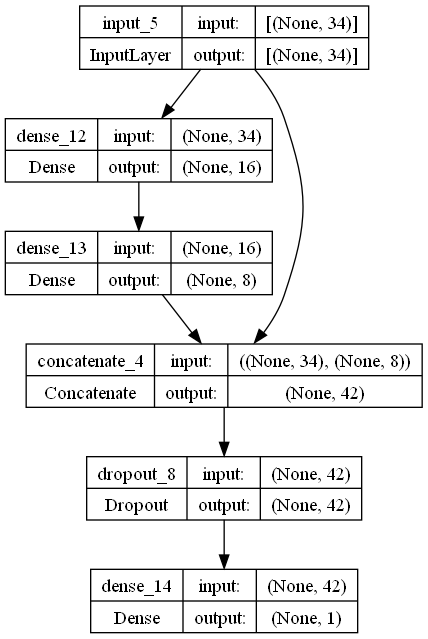

In [538]:
# plot
tf.keras.utils.plot_model(model_functional_imp, show_shapes = True)

### Model Training

In [555]:
# train model
%time
history_func_imp = model_functional_imp.fit(Xy_train_tpipe,
                                   epochs = 50,
                                   validation_data = (Xy_val_tpipe),
                                   batch_size = 500,
                                   callbacks = cb_es_val)

CPU times: total: 0 ns
Wall time: 9.3 ms
Epoch 1/50
3162/3162 [==============================] - 12s 2ms/step - loss: 0.4296 - binary_accuracy: 0.7649 - recall_1: 0.8029 - precision_1: 0.7910 - val_loss: 0.3312 - val_binary_accuracy: 0.8505 - val_recall_1: 0.8643 - val_precision_1: 0.8286
Epoch 2/50
3162/3162 [==============================] - 9s 2ms/step - loss: 0.3350 - binary_accuracy: 0.8500 - recall_1: 0.8585 - precision_1: 0.8477 - val_loss: 0.3236 - val_binary_accuracy: 0.8532 - val_recall_1: 0.8606 - val_precision_1: 0.8397
Epoch 3/50
3162/3162 [==============================] - 7s 2ms/step - loss: 0.3284 - binary_accuracy: 0.8501 - recall_1: 0.8581 - precision_1: 0.8528 - val_loss: 0.3202 - val_binary_accuracy: 0.8525 - val_recall_1: 0.8564 - val_precision_1: 0.8476
Epoch 4/50
3162/3162 [==============================] - 7s 2ms/step - loss: 0.3229 - binary_accuracy: 0.8513 - recall_1: 0.8564 - precision_1: 0.8574 - val_loss: 0.3167 - val_binary_accuracy: 0.8532 - val_recall_1:

### Model Evaluation

In [540]:
# create dataframe
history_func_imp_df = pd.DataFrame(history_func_imp.history)
history_func_imp_df.tail(5)

,loss,binary_accuracy,recall,precision,val_loss,val_binary_accuracy,val_recall,val_precision
45,0.227533,0.902856,0.918802,0.920757,0.222015,0.912819,0.948133,0.901381
46,0.224436,0.905031,0.920596,0.922115,0.219297,0.913043,0.947303,0.903800
47,0.225183,0.905466,0.917667,0.923142,0.217680,0.912819,0.942739,0.907348
48,0.223328,0.907009,0.919132,0.924309,0.214869,0.915285,0.940664,0.911540
49,0.221066,0.909086,0.918729,0.925266,0.212444,0.914836,0.938589,0.911362


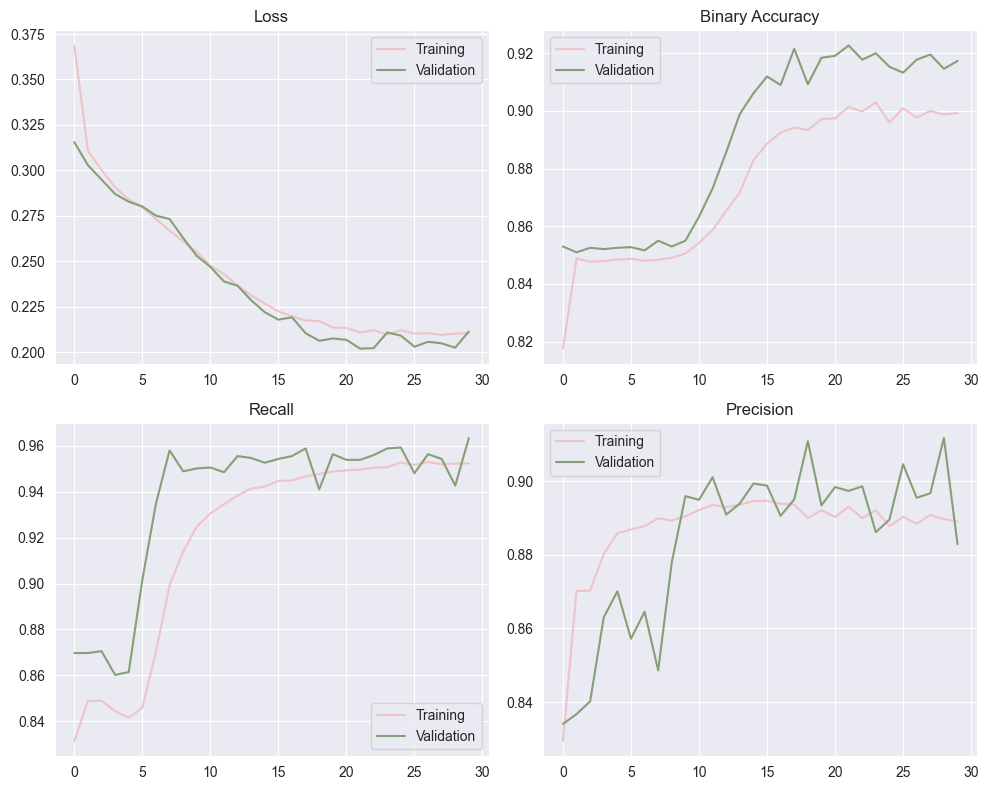

In [501]:
# membuat canvas 2*2
sns.set_style({'axes.grid': True})
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# loss
axes[0, 0].plot(history_func_imp_df['loss'], color = '#EFc3ca')
axes[0, 0].plot(history_func_imp_df['val_loss'], color = '#869f77')
axes[0, 0].set_title('Loss')
axes[0, 0].legend(['Training', 'Validation'])

# binary accuracy
axes[0, 1].plot(history_func_imp_df['binary_accuracy'],color = '#EFc3ca')
axes[0, 1].plot(history_func_imp_df['val_binary_accuracy'],color = '#869f77')
axes[0, 1].set_title('Binary Accuracy')
axes[0, 1].legend(['Training', 'Validation'])

# Recall
axes[1, 0].plot(history_func_imp_df['recall_3'],color = '#EFc3ca')
axes[1, 0].plot(history_func_imp_df['val_recall_3'],color = '#869f77')
axes[1, 0].set_title('Recall')
axes[1, 0].legend(['Training', 'Validation'])

# Precision
axes[1, 1].plot(history_func_imp_df['precision_3'],color = '#EFc3ca')
axes[1, 1].plot(history_func_imp_df['val_precision_3'],color = '#869f77')
axes[1, 1].set_title('Precision')
axes[1, 1].legend(['Training', 'Validation'])

# show plot
plt.tight_layout()
plt.show()

In [479]:
# evaluation
y_pred_func_imp = model_functional_imp.predict(X_test_trns)
y_pred_func_imp = np.where(y_pred_func_imp >=0.5, 1,0 )
print (classification_report(y_test,y_pred_func_imp))

165/165 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      2414
           1       0.90      0.95      0.92      2835

    accuracy                           0.92      5249
   macro avg       0.92      0.91      0.92      5249
weighted avg       0.92      0.92      0.92      5249



Ada *improvement* yang terlihat dari nilai recall, precision, dan f1-score secara general. Ada penurunan pada recall untuk index 0, namun index tersebut bukanlah index yang menjadi prioritas kami. Jika dilihat dari grafik loss, terlihat bahwa model cenderung `good-fit`, hanya saja memiliki gradien yang kurang stabil. 

# VIII. Model Comparison

### Model Selection

Karena sebelumnya kita telah melakukan percobaan model default serta model dengan *optimized improvement*, hasil dari performa model tersebut akan dibandingkan dengan membandingkan beberapa faktor seperti accuracy, recall, dan lainnya. Selain itu, pertimbangan lainnya juga akan menjadi pertimbangan kami dalam pemilihan final model yang dianggap terbaik. 

In [480]:
print(f'--------- F1 Score ---------')
print('F1 Score Sequential Default  : ', round(f1_score(y_test, y_pred_seq_def),4))
print('F1 Score Sequential Improved : ', round(f1_score(y_test, y_pred_seq_imp),4))
print('F1 Score Functional Default  : ', round(f1_score(y_test, y_pred_func_def),4))
print('F1 Score Functional Improved : ', round(f1_score(y_test, y_pred_func_imp),4))

--------- F1 Score ---------
F1 Score Sequential Default  :  0.9233
F1 Score Sequential Improved :  0.9238
F1 Score Functional Default  :  0.926
F1 Score Functional Improved :  0.9247


In [587]:
print(f'------------ Accuracy Score ------------')
print('Accuracy Score Sequential Default  : ', round(accuracy_score(y_test, y_pred_seq_def),4))
print('Accuracy Score Sequential Improved : ', round(accuracy_score(y_test, y_pred_seq_imp),4))
print('Accuracy Score Functional Default  : ', round(accuracy_score(y_test, y_pred_func_def),4))
print('Accuracy Score Functional Improved : ', round(accuracy_score(y_test, y_pred_func_imp),4))

------------ Accuracy Score ------------
Accuracy Score Sequential Default  :  0.9166
Accuracy Score Sequential Improved :  0.9198
Accuracy Score Functional Default  :  0.9185
Accuracy Score Functional Improved :  0.9162


In [588]:
print(f'------------ Recall Score ------------')
print('Recall Score Sequential Default  : ', round(recall_score(y_test, y_pred_seq_def),4))
print('Recall Score Sequential Improved : ', round(recall_score(y_test, y_pred_seq_imp),4))
print('Recall Score Functional Default  : ', round(recall_score(y_test, y_pred_func_def),4))
print('Recall Score Functional Improved : ', round(recall_score(y_test, y_pred_func_imp),4))

------------ Recall Score ------------
Recall Score Sequential Default  :  0.9298
Recall Score Sequential Improved :  0.9305
Recall Score Functional Default  :  0.945
Recall Score Functional Improved :  0.9534


Dari hasil evaluasi tersebut terlihat bahwa model dengan nilai f1 untuk data test tertinggi adalah `improved functional` dengan nilai 0.924. Model ini juga memiliki nilai recall yang baik, yakni 0.95, dimana nilai tersebut merupakan `metrik utama` yang dicari dalam konteks bisnis memprediksi *churn* (mengurangi False Negatives/ menghindari prediksi customer *churn* namun diprediksi sebaliknya).

Pertimbangan lainnya adalah dengan melihat grafik, dimana ditemui bahwa model *improved functional* memiliki nilai loss yang lebih baik dan ternilai cukup good-fit. 

<Axes: >

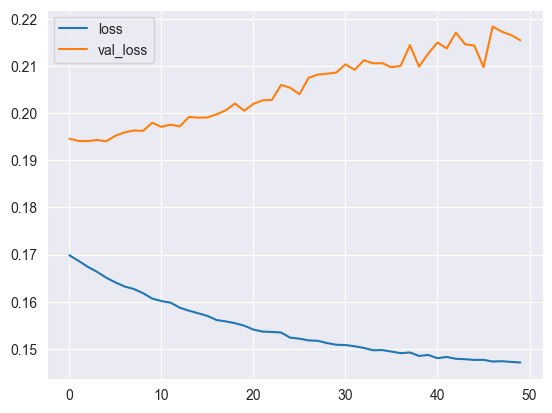

In [591]:
# default functional
history_func_def_df[['loss', 'val_loss']].plot()

<Axes: >

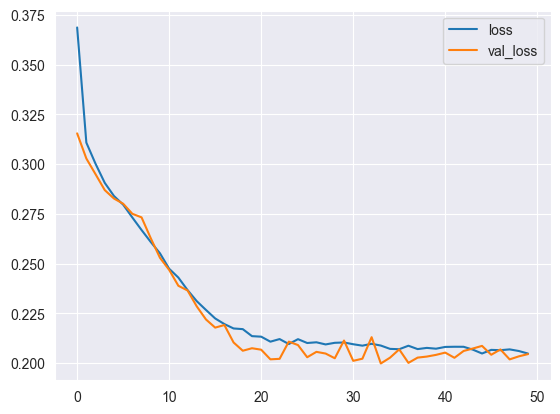

In [439]:
# improved functional
history_func_imp_df[['loss', 'val_loss']].plot()

Kami memilih untuk memiliki model dengan skor good-fit dibandingkan model yang overfit (sekalipun ada perbedaan angka yang sedikit lebih baik) karena alasan berikut:

1. Generalisasi yang lebih baik: Model akan memberikan hasil yang lebih dapat diandalkan dan relevan ketika digunakan untuk melakukan prediksi pada situasi dunia nyata.


2. Keberlanjutan performa: Model yang overfit cenderung memiliki performa yang sangat bergantung pada data pelatihan tertentu, sehingga jika ada perubahan pada data pelatihan atau `penambahan data baru`, performa model tersebut dapat `menurun secara signifikan`.

3. Mudah dipahami: Model goodfit seringkali lebih mudah diinterpretasikan dan dipahami oleh manusia.

(sumber: [shiksha.com: Overfitting and Underfitting with Real Life Examples](https://www.shiksha.com/online-courses/articles/overfitting-and-underfitting-with-a-real-life-example/))

### Model Parameter and Optimizer

Berikut adalah beberapa optimisasi yang dilaksanakan dalam model tersebut: 

- Implementasi Early stopping berdasarkan 'val_loss'
- Memiliki epoch yang lebih besar
- Memiliki dua hidden layer.
- Memiliki 16 neuron pada hidden layer pertama. 
- Memiliki 8 neuron pada hidden layer kedua. 
- Mengimplementasi Dropout.

Selain dari parameter di atas, model masih memiliki parameter serta optimisasi lainnya yang belum sempat kami eksplor karena keterbatasan waktu. 

Model ini juga memiliki jumlah layer dan neuron yang `lebih sederhana`, walaupun dalam pelaksanaannya akan terlihat arsitektur yang sedikit lebih kompleks karena memiliki tambahan optimizer seperti dropout dan sebagainya. Dalam hal optimalisasi waktu, model memiliki waktu `kira-kira 4 detik` tiap epoch. Hal tersebut merupakan improvisasi dbandingkan model lainnya yang butuh menghabiskan waktu 5-6 detik. Sebenarnya dalam hal ini waktu tidak begitu menjadi hal yang kami prioritaskan. Hal ini dikarenakan membutuhkan beberapa hari bagi customer untuk dianggap sebagai *churn* (menurut hasil eksplorasi, setidaknya dua minggu). Namun perbedaan waktu akan terasa apabila skala data bertambah, terlebih karena perusahaan pasti memiliki data yang terus diperbarui setiap harinya. 

 Untuk selanjutnya model ini akan dievaluasi lebih rinci dan dilakukan *inferencing* untuk analisis domain lebih mendalam. 

# IX. Model Evaluation

### Evaluation

In [597]:
# melihat report
print (classification_report(y_test,y_pred_func_imp))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      2414
           1       0.90      0.95      0.92      2835

    accuracy                           0.92      5249
   macro avg       0.92      0.91      0.92      5249
weighted avg       0.92      0.92      0.92      5249



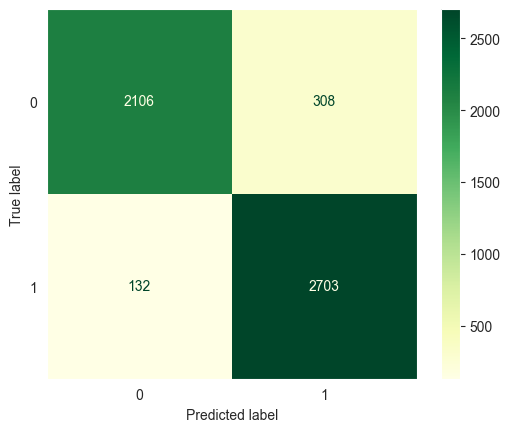

In [507]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred_func_imp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
sns.set_style({'axes.grid': False})
disp.plot(cmap='YlGn')
plt.show()

Sebelumnya, telah diketahui bahwa model memiliki tendensi untuk *overfit*. Dari hasil evaluasi tersebut, terlihat bahwa data memiliki hasil f1-score pada data test terhadap pelanggan `churn` sebesar 0.92. Dari nilai-nilai pada tabel maupun plot di atas, dapat dibuat perumpamaan sebagai berikut:
- Dari 2835 pelanggan yang seharusnya termasuk *churn*, masih ada 132 diantaranya yang terprediksi sebagai pelanggan loyal. Kesalahan prediksi negatif dapat menyebabkan `kehilangan pelanggan yang berpotensi bernilai tinggi dan mengurangi kepuasan pelanggan` (untuk hubungan dengan domain lebih lanjut dapat dilihat pada bagian kesimpulan dan *suggestions*).
- Sementara itu, dari 2414 pelanggan, ada 308 pelanggan yang terprediksi *churn*. Hal ini memang tidak memberikan resiko sebesar poin sebelumnya, namun kesalahan prediksi positif dapat mengakibatkan tindakan yang tidak perlu dilakukan; seperti terlanjur mengirimkan penawaran khusus kepada pelanggan yang sebenarnya tidak ingin berhenti.

Dalam hal ini, kita ingin memaksimalkan nilai `recall` (ingin meminimalisir False Negatives) untuk menghindari adanya pelanggan terindikasi akan *churn* yang tidak terdeteksi. Namun kita juga membutuhkan nilai precision yang baik jika ingin menganalisis masing-masing pelanggan lebih lanjut dan menangani masalah mereka. 

Maka dari itu secara garis besar, model sangat baik dalam memprediksi *churn* pelanggan. Hanya saja, kami merekomendasikan untuk `tidak menggunakan model bila ingin melihat rasio tidak churn` karena memiliki nilai recall/ akurasi yang lebih rendah. 

### Result Analysis

Pada bagian ini akan dilakukan perbandingan dari hasil prediksi terhadap data tes asli.

In [592]:
# membuat menjadi 1 dimensi
y_test_ravel = y_test.ravel()  # membuat 1d
y_pred_func_imp_ravel = y_pred_func_imp.ravel()  # membuat 1d

# membuat dataframe hasil prediksi dan aktual
model_result = pd.DataFrame({
    'Customers Churn (actual)':y_test_ravel,
    'Customers Churn (pred)':y_pred_func_imp_ravel
})
model_result

,Customers Churn (actual),Customers Churn (pred)
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5244,0,0
5245,0,0
5246,0,1
5247,1,1


In [593]:
# melihat deskripsi model
model_result.describe()

,Customers Churn (actual),Customers Churn (pred)
count,5249.000000,5249.000000
mean,0.540103,0.573633
std,0.498437,0.494596
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [596]:
print('Actual:',model_result['Customers Churn (actual)'].sum())
print('Pred:',model_result['Customers Churn (pred)'].sum())

Actual: 2835
Pred: 3011


Jika melihat perbandingan nilai aktual dan prediksi, diketahui bahwa model masih memiliki kekurangan di mana model memiliki tendensi untuk salah memperkirakan pelanggan *churn* (index = 1); ditandai dengan `prediksi churn yang berlebihan` (seharusnya hanya 2835, namun terdeteksi 3011 pelanggan). Hal ini sebenarnya bukan merupakan masalah utama karena model dianggap telah berhasil meminimalisir False Negatives. Namun begitu, kesalahan prediksi (dalam hal ini berarti False Positive berlebihan) juga dapat memberikan resiko hilangnya *opportunity* bisnis (terlalu pesimis) serta dapat terjadi kesalahan perhitungan beban dan pengeluaran. 

Secara garis besar, kami menganggap model ini sudah cukup baik; walaupun belum sepenuhnya akurat, `model sudah dapat mengurangi False Negatives` yang dianggap dapat memberikan kerugian finansial yang lebih besar bagi perusahaan.

# X. Model Save Load

Dilakukan save model terpilih untuk digunakan pada model *deployment*. 

In [541]:
# menyimpan model
import pickle
with open('final_pipeline.pkl', 'wb') as file_1:
    pickle.dump(final_pipeline, file_1)

In [542]:
# freeze model yang ingin digunakan
model_functional_imp.trainable = False
model_functional_imp.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 16)           560         ['input_5[0][0]']                
                                                                                                  
 dense_13 (Dense)               (None, 8)            136         ['dense_12[0][0]']               
                                                                                                  
 concatenate_4 (Concatenate)    (None, 42)           0           ['input_5[0][0]',                
                                                                  'dense_13[0][0]']         

In [543]:
# freeze model yang ingin digunakan
model_functional_imp.save('churn_func.h5') # extention

# XI. Conclusion & Suggestions

### Conclusion

Pada proyek ini, kami telah membuat model Artificial Neural Network untuk memprediksi tendensi pelanggan untuk *churn*. Berikut adalah kesimpulan serta analisis dari proyek ini:

**1. Data Exploration:**

Dari hasil eksplorasi data, kita telah mengetahui bahwa:
- Target merupakan data kategorikal yang terdiri atas dua kategori atau biner dengan perbandingan kurang lebih 54:46; dimana *churn* merupakan rasio yang lebih tinggi. 
- Ukuran data termasuk sedang karena memiliki kurang lebih 35,000 baris. 
- Beberapa fitur memiliki hubungan linear terhadap target; 'avg_transaction_value', 'feedback', 'membership_category', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', dan beberapa fitur lainnya. 
- Beberapa fitur belum terlihat korelasinya dengan target, diantaranya adalah; 'age', 'internet_option', 'gender', dan sebagainya.
- Pelanggan berindikasi *churn* berciri: tidak memiliki membership, berbelanja dalam total sedikit, frekuensi belanja rendah, lebih sedikit waktu yang digunakan untuk membuka platform.
- Pelanggan berindikasi tidak *churn* berciri: membership tingkat tinggi, berbelanja dalam total tinggi, frekuensi belanja sedang hingga tinggi, memiliki banyak poin, lebih lama menghabiskan waktu dalam platform berbelanja. 

**2. Model Analysis:**

- Model terbaik yang dipilih berdasarkan alur  sequential default > improve, functional default > improve (secara paralel) adalah `improved functional`. Hal ini diasumsikan karena dengan menggunakan model ANN Functional, kita dapat membangun arsitektur dengan lebih fleksibel dan menyesuaikan dengan karakteristik data. 
- Model memiliki tendensi good-fit yang kami anggap sebagai kelebihan yang nyata (model lainnya masih memiliki tendensi overfit) karena seperti yang dijelaskan pada bagian evaluasi, model yang good-fit mengindikasikan bahwa model tersebut lebih stabil dan memiliki adaptability yang lebih baik. Kami mementingkan performa model kedepannya yang akan berhubungan dengan update data baru dari perusahaan, tidak hanya pada tahap percobaan. 
- Walaupun model memiliki nilai presisi yang sedikit lebih rendah, namun model final memberikan prediksi lebih baik, utamanya karena kami ingin meminimalisir False Negatives.
- Model final memiliki masa training yang paling efektif. 

**3. Model on Businesss Domain:**

   Kami menganggap bahwaa model sudah memiliki niai keakuratan yang baik dan dapat digunakan untuk mendapatkan gambaran umum pelanggan di perusahaan. Model sangat baik dalam memprediksi *churn* dengan nilai recall sebesar 95%--menggambarkan bahwa model telah meminimalisir kesalahan prediksi *churn* sebagai tidak *churn* yang dapat memberikan kerugian finansial. Walaupun begitu, ada beberapa kekurangan pada model, yakni:

   - Cenderung `memprediksi tidak churn sebagai churn` (False Positives).
   - Konsekuensi dari kesalahan FP adalah perusahaan dapat menghabiskan tenaga dan biaya pada upaya pencegahan pelanggan churn. 
   - Kesalahan FP juga dapat mengakibatkan ketidakpuasan pelanggan, hilangnya loyalitas, atau bahkan kehilangan pelanggan yang sebenarnya sudah merasa puas.
   - Kesalahan ini dapat menyebabkan hilangnya *opportunit*y bisnis, yang memang tidak setinggi resiko kesalahan pada False Negatives, tetapi juga dapat memberikan `kerugian` dalam `jangka panjang` (seperti reputasi) yang bisa jadi lebih krusial dibandingkan kesalahan FN. 

**4. Further Improvement:**

- Model dapat mencoba menyaring fitur-fitur yang lebih relevan. Dalam proyek ini, karena model yang akan digunakan adalah beberapa model, pemilihan fitur mungkin menjadi kurang fokus sehingga tidak tersaring dengan baik. Pemilihan fitur dapat dilakukan dengan mengambil lebih banyak fitur ataupun lebih sedikit fitur. 

- Dapat melakukan penanganan lain seperti handling cardinality atau menggunakan *scaler* dan *outlier handler* yang lebih sesuai. 

- Untuk proses modelling, dapat mencoba menggunakan optimizer lain serta teknik handling lainnya. Dapat juga dilakukan uji dengan epoch yang lebih tinggi bila memiliki lebih banyak waktu. 

### Business Strategy Suggestion

Di bawah ini adalah beberapa saran dan strategi bisnis berdasarkan hasil eksplorasi data yang dapat dipertimbangkan:

1. Memperbaiki kualitas produk: Sebelumnya diketahui bahwa banyak pelanggan memberikan komplain mengenai kualitas produk yang buruk. Perlu dilakukan analisis lebih lanjut mengenai kualitas produk tersebut (apakah ketahanannya, fungsionalitasnya, dan lain-lain) untuk dapat melakukan pengembangan produk. Setelahnya, jangan lupa untuk mempromosikan/ memberi transparansi pada customer melalui platform (website, email, dll) bahwa kualitas produk sudah ditingkatkan. 

2. Mencoba *targetted marketing*: Diketahui bahwa target pemasaran perusahaan ini sangatlah luas. Pengguna platform berasal dari semua umur dengan jenis kelamin yang seimbang. Tidak masalah apabila ingin membuat produk dan layanan untuk segala kalangan, namun kita dapat mencoba untuk membuat pengelompokkan-pengelompokkan tertentu yang disesuaikan untuk kalangan tertentu. Misalnya, perusahaan dapat mengeluarkan edisi khusus anak-anak, khusus orang dewasa, atau bahkan edisi-edisi lainnya diluar dari klasifikasi umur. Dengan begitu pemasaran perusahaan akan `mengenai seluruh kalangan` namun dengan spesifikasi dan `strategi yang berbeda-beda`. 

3. Re-design membership: Dapat dicoba untuk meningkatkan benefit untuk membership tingkat tinggi. Atau selarasan dengan itu, `mempermudah` pencapaian membership suatu pelanggan. Sehingga, pelanggan juga akan merasa bahwa ia dibutuhkan dan membutuhkan perusahaan. Jangan lupa untuk memberikan `minimum pencapaian` serta `benefit` yang berbeda-beda pada tiap tingkatan. Misalnya:
- Basic: Paling mudah untuk didapatkan, benefit hanya sedikit.
- Silver: Masih sangat mudah untuk didapatkan, benefit menengah.
- Gold: Relatif mudah didapatkan, benefit cukup banyak. 
- Platinum: Kesulitan menengah untuk didapatkan, benefit sangat banyak. Memberikan badge khusus yang dapat membedakannya dengan pelanggan lain (memberi rasa bangga)

`Pada tahun kedua, perusahaan dapat meningkatkan syarat` untuk mempertahankan status membership (misalnya meningkatkan minimum order perbulannya). Pelanggan yang `sudah nyaman` dengan membership akan sulit untuk meninggalkan membership dan akan terus mengejar target agar tidak kehilangan membership.
Strategi tersebut hanya merupakan contoh. Dapat dicoba kombinasi pola lainnya dengan mempertimbangan psikologi pelanggan. 


4. Meninggalkan side project: Fokus pada hal yang relevan seperti kualitas produk dan pelayanan. Sementara itu, `faktor lain seperti ajakan referral` yang dalam kasus perusahaan kami justru meningkatkan *churn*, dapat dicoba untuk ditinggalkan/ di-hold agar tidak memecah fokus. Ajakan referral memang menguntungkan karena sangat membantu promosi, namun sepertinya dalam kasus perusahaan kami justru menimbulkan banyak pelanggan yang tidak bertahan lama serta dapat memberikan kekurangan pendapatan karena harus memberikan *intensif* referral. Sebaliknya, cobalah untuk fokus pada promosi yang lebih bertarget untuk `menemukan pelanggan yang memang membutuhkan` kita dan bertahan lama. Perusahaan dapat kembali menggunakan strategi lainnya (yang sudah dikembangan terlebih dahulu) apabila kondisi sudah lebih stabil.

5. Pemantauan Pelanggan: Lakukan pemantauan terhadap aktivitas pelanggan, seperti frekuensi kunjungan, pola penggunaan, dan preferensi. Contoh:
- Dapat mengetahui jam aktif pelanggan dari eksplorasi data. `Pada jam-jam tersebut`, dapat diberikan diskon atau promo khusus pelanggan yang login pada jam tersebut
- Kita telah mengetahui waktu terakhir login pelanggan (tendensi untuk *churn* ketika sudah dua minggu tidak login). Berikan `peringatan dan notifikasi barang baru` agar pelanggan tertarik lagi untuk mengunjungi platform. 

6. Perbaiki performa layanan secara umum: Lebih tanggap dalam menyelesaikan komplain, menanyakan feedback, mempercepat pelayanan, memperbaiki interface aplikasi, dan sebagainya. 

### Note: Personal Findings

Bagian ini hanya menjelaskan *personal finding* yang menurut saya menarik dan dapat dijadikan pertimbangan untuk evaluasi. 

Sebelumnya, saya telah melakukan beberapa percobaan dengan data yang sama, namun dengan beberapa perbedaan, yakni:
- Tidak mengatasi missing value, tidak menggunakan pipeline tensorflow (tidak ada repeat), dll
- Scaling semua numerikal dengan StandardScaler (secara teori sebenarnya lebih direkomendasikan untuk data normal, sedangkan data kami mayoritas tidak tersebar secara normal)
- Encoding semua kategorikal dengan OneHot (secara teori tidak terlalu sesuai, karena masih ada kolom ordinal)
- Arsitektur sederhana, 16 neuron pada hidden layer pertama serta 8 neuron pada hidden layer kedua. Aktivasi relu, serta optimizer adam.

Dengan pengaturan seperti itu, saya mendapati bahwa saya mendapatkan gradien loss yang lebih halus. Selain itu untuk nilai akurasinya mencapai hingga 90-93% dengan sedikit perbedaan optimisasi/ arsitektur. 






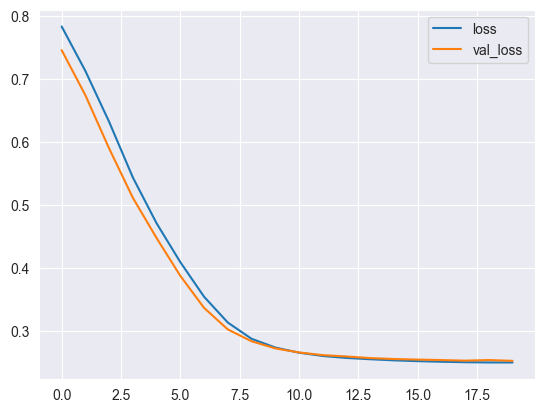


Gradien loss yang halus mengindikasikan bahwa proses optimisasi berjalan dengan stabil dan dan mendekati solusi optimal (konvergensi lebih cepat, lebih tahan noise). Sebaliknya, gradien loss yang `bergoyang`/ bergerigi dengan fluktuasi biasanya mengindikasikan ketidakstabilan atau kesulitan dalam menemukan solusi optimal--kecenderungan yang saya dapatkan ketika saya telah membersihkan data terlebih dahulu. Menurut saya hal ini merupakan hal yang sangat menarik. Saya kemudian menemukan beberapa alasan serta asumsi pribadi yang dapat menyebabkan hal ini untuk terjadi:


1. Pengaruh perubahan data: Pemrosesan data yang terlalu rinci dapat mengubah distribusi data. Parameter-parameter yang digunakan mungkin menjadi kurang sesuai. Model membutuhkan penyesuaian untuk mengikuti perubahan tersebut.

2. Perbedaan skala: Bisa jadi data lebih cocok menggunakan scaler lain; entah karena ada suatu fitur yang kuat yang lebih cocok dengan scaler tersebut dan hal lainnya. 

3. Pengaruh encoder: Seperti pada poin sebelumnya, kita tidak bisa menutup kemungkinan bahwa transformer yang kita asumsikan kurang sesuai justru memberikan hasil yang lebih baik.

4. Model membutuhkan banyak data. Pembersihan missing value mungkin menghilangkan informasi tersebut.

5. Kesalahan asumsi. Perlu dipertimbangkan apakah penggunaan scaler, encoder, dan langkah-langkah lainnya sudah sesuai dengan karakteristik data, karena setiap dataset memiliki keunikan sendiri. Bisa jadi asumsi kita kurang tepat, `overprocessed`, atau mungkin kita memerlukan pengetahuan mengenai transformer lainnya yang sesuai dengan keunikan data. 

6. Faktor kebetulan (misalnya hanya berlaku dalam random state tersebut dan performa selanjutnya tidak stabil). 

Terlepas dari itu, perlu dicatat bahwa kehalusan gradien loss saja tidak menjamin performa model yang lebih baik. Hal ini hanya menjadi salah satu aspek yang perlu dipertimbangkan bersama dengan metrik lain seperti akurasi, presisi, recall, bahkan persyaratan domain spesifik. Namun hal ini tetap merupakan sesuatu yang menarik yang mungkin dapat kita lakukan percobaan lanjut dikesempatan lain apabila memiliki waktu yang cukup. 

(sumber: [Neuroendocrinol Lett 2015; 36(4):348–353](https://www.researchgate.net/figure/ANN-model-of-prediction-of-FH-based-on-unprocessed-raw-data_fig2_282765723), [Towards Data Science](https://towardsdatascience.com/data-quality-considerations-for-machine-learning-models-dcbe9cab34cb))
